# Real Estate Listings Analysis

Dataset: Yandex.Realty — archive of apartment sale listings in St. Petersburg and nearby localities over several years.  
The goal is to learn how to determine the market value of real estate.  
Task: identify key parameters to build an automated system that will detect anomalies and fraudulent activity.  

Each listing provides two types of data:  
- entered by the user;  
- automatically generated from mapping data (e.g., distance to city center, airport, nearest park, or body of water).  

### Open the data file and review general information.

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

In [260]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

In [261]:
# check for obvious duplicates
data.duplicated().sum()

0

In [262]:
# count missing values
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [263]:
# as a share of the entire dataset
data.isna().sum().sort_values(ascending=False)/len(data) * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

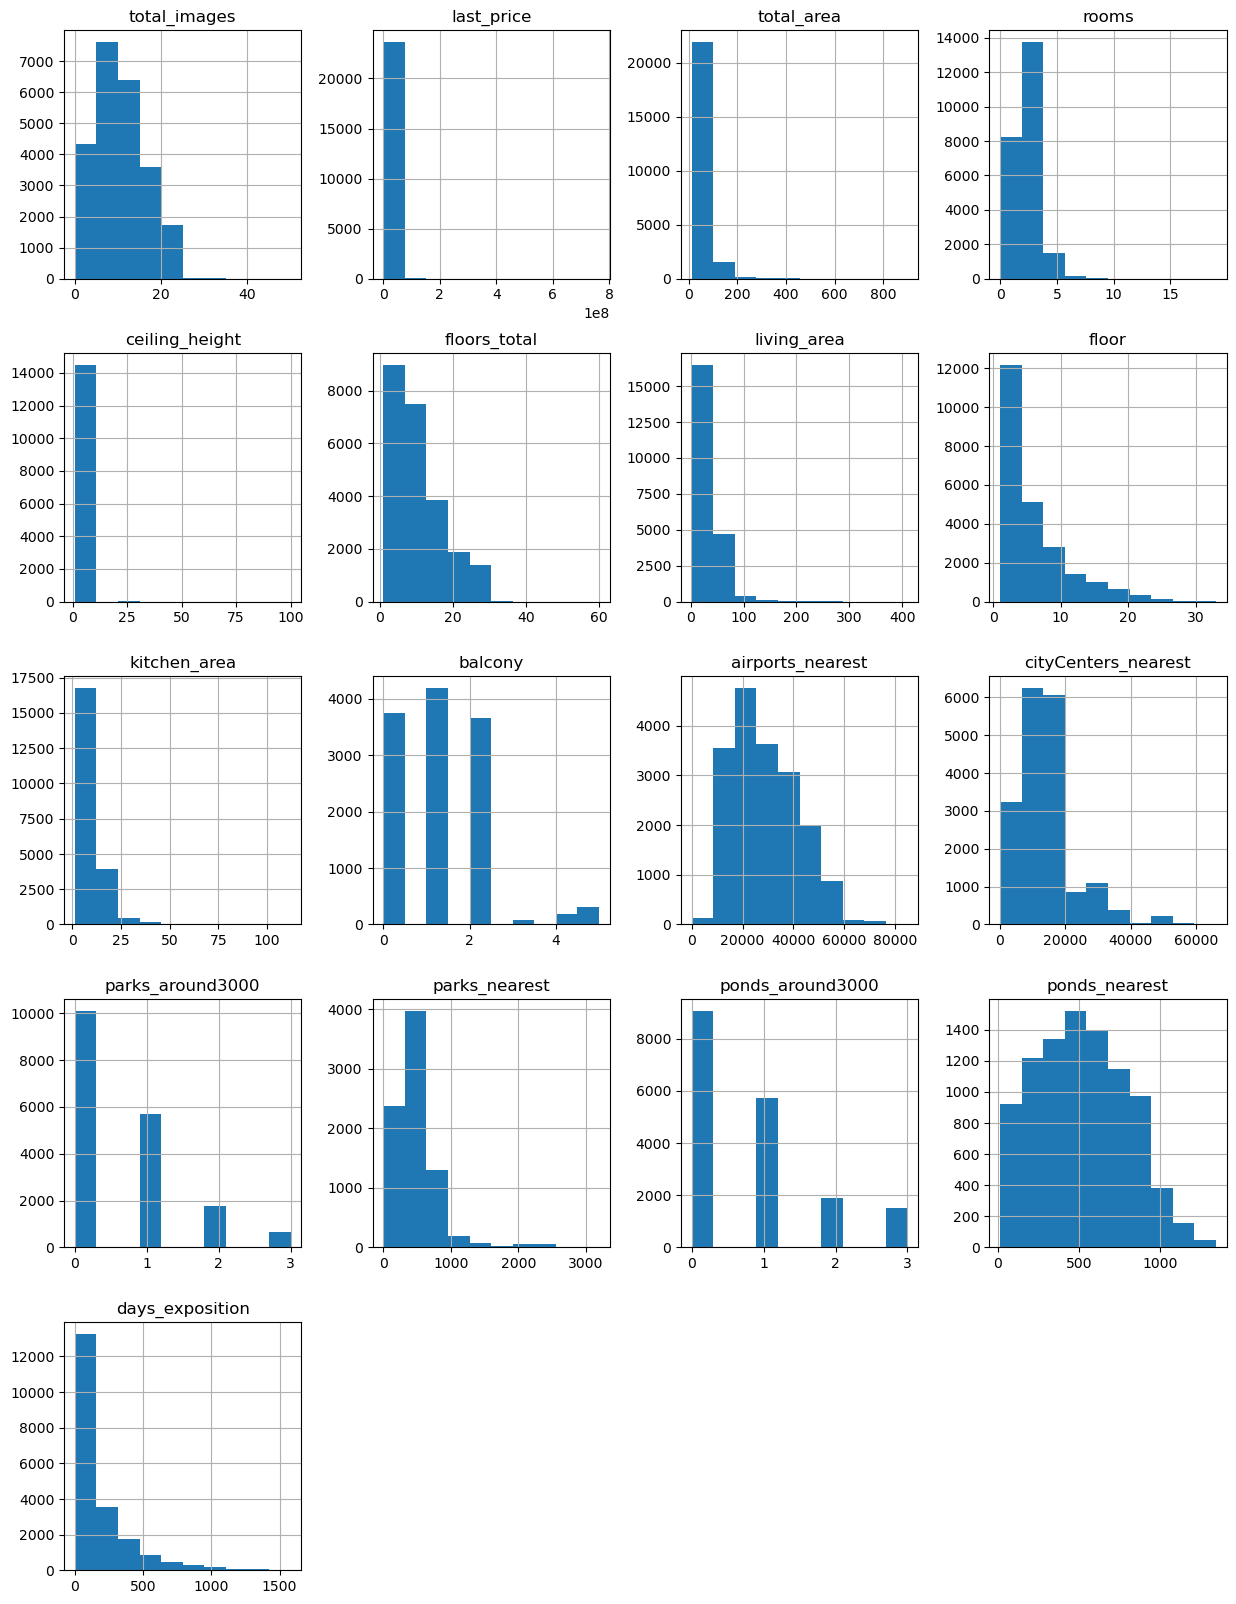

In [264]:
data.hist(figsize=(15, 20))

**Conclusion:**

1. Most missing values are in mapping data, likely because the algorithm could not fill them.  
2. In user-entered data, the share of missing values is generally lower.  
3. No obvious duplicates found.  
4. Many numeric values are stored as float, which is sometimes inconvenient for processing and visualization.  
5. Some columns, such as `days_exposition` and `total_area`, contain anomalous values.  

### Data Preprocessing

Let’s review the columns with missing values in descending order of missing count.  

#### **Apartment indicator:**

In [265]:
# apartments
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

It is possible that there are indeed very few apartments — only about 50.  

It may also be because St. Petersburg has more older housing stock, and sellers simply leave this column empty as unnecessary.  

It would be incorrect to fill all missing values with `False`, since even if grouping is needed, the vast majority would already be `False`. Marked apartments can be filtered without filling the gaps.  

We will leave the missing values in `is_apartment` as they are, since this does not currently affect the analysis. 

#### **Distance to and availability of parks/ponds:**

In [266]:
print(data['ponds_around3000'].unique())
data['parks_around3000'].unique()

[ 2.  0.  3.  1. nan]


array([ 1.,  0.,  2., nan,  3.])

It is logical to assume that missing values in these columns mean there are no parks within 3 km. Let’s check a few examples.  

In [267]:
data.query('ponds_around3000 == 0')

total_images  last_price  total_area first_day_exposition  rooms  \
1                 7   3350000.0        40.4  2018-12-04T00:00:00      1   
6                 6   3700000.0        37.3  2017-11-02T00:00:00      1   
7                 5   7915000.0        71.6  2019-04-18T00:00:00      2   
9                18   5400000.0        61.0  2017-02-26T00:00:00      3   
11                9   3300000.0        44.0  2018-08-27T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23684            20  21400000.0       145.0  2018-11-02T00:00:00      4   
23685            15   2490000.0        31.0  2019-01-24T00:00:00      1   
23687             6   3200000.0        39.0  2017-12-16T00:00:00      1   
23688            19   9200000.0       101.0  2019-04-01T00:00:00      3   
23690             3   5500000.0        52.0  2018-07-19T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1                 NaN          11.0         18.6      1          NaN   False   
6                 NaN          26.0         10.6      6          NaN   False   
7                 NaN          24.0          NaN     22          NaN   False   
9                2.50           9.0         43.6      7          NaN   False   
11                NaN           5.0         31.0      4        False   False   
...               ...           ...          ...    ...          ...     ...   
23684            3.00          26.0         71.4     17          NaN   False   
23685            2.50           5.0         17.3      5          NaN   False   
23687             NaN           9.0         20.0      6          NaN   False   
23688            3.05          15.0         63.0     12          NaN   False   
23690             NaN           5.0         31.0      2          NaN   False   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
1          False          11.0      2.0     посёлок Шушары           12817.0   
6          False          14.4      1.0  посёлок Парголово           52996.0   
7          False          18.9      2.0    Санкт-Петербург           23982.0   
9          False           6.5      2.0    Санкт-Петербург           50898.0   
11         False           6.0      1.0          Ломоносов           48252.0   
...          ...           ...      ...                ...               ...   
23684      False          15.6      NaN    Санкт-Петербург           11827.0   
23685      False           5.6      1.0          Ломоносов           48393.0   
23687      False          11.0      2.0    Санкт-Петербург           40837.0   
23688      False          15.0      NaN    Санкт-Петербург           15632.0   
23690      False           6.0      NaN    Санкт-Петербург           20151.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1                  18603.0               0.0            NaN               0.0   
6                  19143.0               0.0            NaN               0.0   
7                  11634.0               0.0            NaN               0.0   
9                  15008.0               0.0            NaN               0.0   
11                 51677.0               0.0            NaN               0.0   
...                    ...               ...            ...               ...   
23684              11459.0               0.0            NaN               0.0   
23685              51818.0               0.0            NaN               0.0   
23687              16704.0               0.0            NaN               0.0   
23688              14428.0               0.0            NaN               0.0   
23690               6263.0               1.0          300.0               0.0   

       ponds_nearest  days_exposition  
1                NaN             81.0  
6                NaN            155.0  
7                NaN              NaN  
9                NaN            289.0  
11         

In [268]:
data.query('parks_around3000 == 0')

total_images  last_price  total_area first_day_exposition  rooms  \
1                 7   3350000.0        40.4  2018-12-04T00:00:00      1   
6                 6   3700000.0        37.3  2017-11-02T00:00:00      1   
7                 5   7915000.0        71.6  2019-04-18T00:00:00      2   
9                18   5400000.0        61.0  2017-02-26T00:00:00      3   
11                9   3300000.0        44.0  2018-08-27T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23684            20  21400000.0       145.0  2018-11-02T00:00:00      4   
23685            15   2490000.0        31.0  2019-01-24T00:00:00      1   
23687             6   3200000.0        39.0  2017-12-16T00:00:00      1   
23688            19   9200000.0       101.0  2019-04-01T00:00:00      3   
23691            11   9470000.0        72.9  2016-10-13T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1                 NaN          11.0         18.6      1          NaN   False   
6                 NaN          26.0         10.6      6          NaN   False   
7                 NaN          24.0          NaN     22          NaN   False   
9                2.50           9.0         43.6      7          NaN   False   
11                NaN           5.0         31.0      4        False   False   
...               ...           ...          ...    ...          ...     ...   
23684            3.00          26.0         71.4     17          NaN   False   
23685            2.50           5.0         17.3      5          NaN   False   
23687             NaN           9.0         20.0      6          NaN   False   
23688            3.05          15.0         63.0     12          NaN   False   
23691            2.75          25.0         40.3      7          NaN   False   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
1          False          11.0      2.0     посёлок Шушары           12817.0   
6          False          14.4      1.0  посёлок Парголово           52996.0   
7          False          18.9      2.0    Санкт-Петербург           23982.0   
9          False           6.5      2.0    Санкт-Петербург           50898.0   
11         False           6.0      1.0          Ломоносов           48252.0   
...          ...           ...      ...                ...               ...   
23684      False          15.6      NaN    Санкт-Петербург           11827.0   
23685      False           5.6      1.0          Ломоносов           48393.0   
23687      False          11.0      2.0    Санкт-Петербург           40837.0   
23688      False          15.0      NaN    Санкт-Петербург           15632.0   
23691      False          10.6      1.0    Санкт-Петербург           19424.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1                  18603.0               0.0            NaN               0.0   
6                  19143.0               0.0            NaN               0.0   
7                  11634.0               0.0            NaN               0.0   
9                  15008.0               0.0            NaN               0.0   
11                 51677.0               0.0            NaN               0.0   
...                    ...               ...            ...               ...   
23684              11459.0               0.0            NaN               0.0   
23685              51818.0               0.0            NaN               0.0   
23687              16704.0               0.0            NaN               0.0   
23688              14428.0               0.0            NaN               0.0   
23691               4489.0               0.0            NaN               1.0   

       ponds_nearest  days_exposition  
1                NaN             81.0  
6                NaN            155.0  
7                NaN              NaN  
9                NaN            289.0  
11         

Where `ponds_around3000` equals 0, the distance to a pond is marked as NaN. The same applies to parks.  

We will replace the missing values in these columns with 0.  

In [269]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Check if the missing values have been filled.  

In [270]:
print(data['ponds_around3000'].isna().sum())
data['parks_around3000'].isna().sum()

0


0

Convert the data type of these columns to numeric, since the number of ponds and parks cannot be fractional.  

In [271]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')

#### **Number of balconies:**

In [272]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

If the seller did not specify the number of balconies, it most likely means there are none — replace missing values with 0.

In [273]:
data['balcony'] = data['balcony'].fillna(0)

In [274]:
# check if all missing values were filled  
data['balcony'].isna().sum()

0

In [275]:
data['balcony'] = data['balcony'].astype('int')

#### **Ceiling height** 

In [276]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [277]:
2.8+(2.8-2.5)*1.5

3.2499999999999996

In [278]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<Axes: >

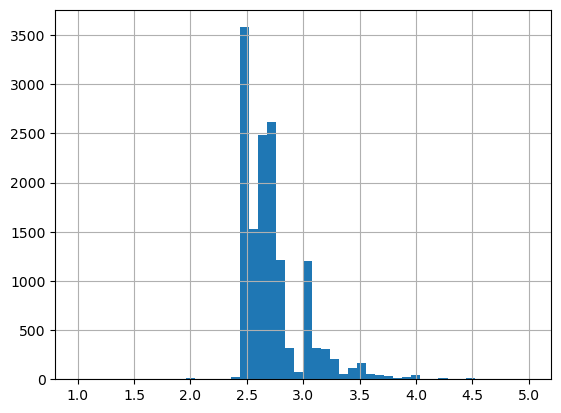

In [279]:
data['ceiling_height'].hist(bins=50,range=(1,5))

The maximum ceiling height value is anomalous. Let’s see how many such values exist.  

In [280]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Some anomalies may be due to incorrect data entry (e.g., 24 instead of 2.4). We will correct such values.  

In [281]:
data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)

In [282]:
data['ceiling_height'] = data['ceiling_height'].replace(27.  , 2.7)

In [283]:
data['ceiling_height'] = data['ceiling_height'].replace(26.  , 2.6)

In [284]:
data['ceiling_height'] = data['ceiling_height'].replace(24.  , 2.4)

In [285]:
data['ceiling_height'] = data['ceiling_height'].replace(25.  , 2.5)

In [286]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

<Axes: >

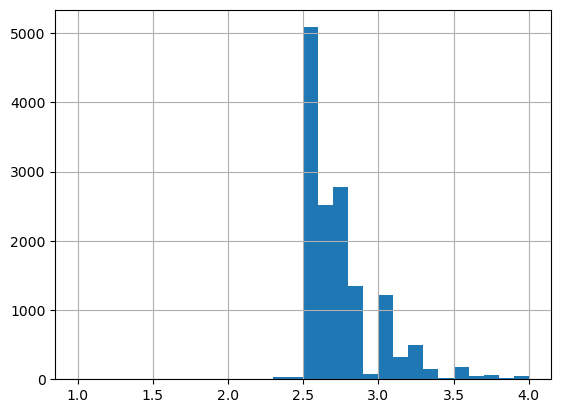

In [287]:
data['ceiling_height'].hist(bins=30,range=(1,4))

Other anomalous values will be treated as outliers.  

In [288]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.740163
std          0.917048
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [289]:
2.8+(2.8-2.51)*1.5

3.235

In [290]:
# review the row with the anomalous value 
data[data['ceiling_height'] > 5].head(10)

total_images   last_price  total_area first_day_exposition  rooms  \
464              15   66571000.0       280.3  2015-06-11T00:00:00      6   
1026             20  155000000.0       310.0  2018-10-12T00:00:00      5   
1388             20   59800000.0       399.0  2015-01-21T00:00:00      5   
3474              3    1400000.0        30.0  2018-03-16T00:00:00      1   
5863             20    5650000.0        45.0  2018-08-15T00:00:00      1   
7578             17   38000000.0       143.0  2017-11-02T00:00:00      3   
12628            14    3900000.0        50.0  2018-03-29T00:00:00      1   
15061            19    5600000.0        56.4  2018-05-11T00:00:00      2   
15743            14    5600000.0        67.0  2016-11-11T00:00:00      3   
17442             0    5350000.0        54.0  2015-06-16T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
464               5.2           8.0        159.5      7          NaN   False   
1026              5.3           3.0        190.0      3          NaN   False   
1388              5.6           6.0          NaN      6          NaN   False   
3474              8.0           5.0         15.3      2        False   False   
5863              8.3          16.0         19.3     14          NaN   False   
7578              5.5           5.0         83.0      5          NaN   False   
12628             5.3           5.0          NaN      5          NaN   False   
15061            14.0          14.0         32.4      5          NaN   False   
15743             8.0          16.0         41.0      1          NaN   False   
17442             8.0           5.0         29.0      2          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
464        False          21.1        0  Санкт-Петербург           26316.0   
1026       False          63.0        2  Санкт-Петербург           24899.0   
1388       False           NaN        0  Санкт-Петербург           26204.0   
3474       False           7.3        0    деревня Нурма               NaN   
5863       False           8.3        1  Санкт-Петербург           13069.0   
7578       False          29.0        1  Санкт-Петербург           26333.0   
12628      False           NaN        0  Санкт-Петербург           19644.0   
15061      False           9.1        2  Санкт-Петербург           14814.0   
15743      False           8.0        0  Санкт-Петербург           32691.0   
17442      False           NaN        1     Красное Село           24638.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
464                 6655.0                 3          187.0                 1   
1026                4785.0                 0            NaN                 1   
1388                6934.0                 2          149.0                 2   
3474                   NaN                 0            NaN                 0   
5863               10763.0                 0            NaN                 1   
7578                6448.0                 3          479.0                 0   
12628               3918.0                 1          505.0                 1   
15061              13610.0                 0            NaN                 0   
15743              11035.0                 1          723.0                 0   
17442              28062.0                 0            NaN                 0   

       ponds_nearest  days_exposition  
464            616.0            578.0  
1026           603.0              NaN  
1388           577.0            719.0  
3474             NaN            125.0  
5863           613.0             14.0  
7578             NaN              NaN  
12628           92.0              8.0  
15061            NaN            315.0  
15743            NaN            474.0  
17442            NaN            469.0

In this row, all data looks questionable: a small living area for such a price, a balcony larger than the living space, etc. This could simply be an error or a draft listing saved by mistake.  

Although all values above 3.2 could be considered outliers, we will only discard values above 5 m (the maximum found in an elite two-story apartment in St. Petersburg on Yandex.Realty) and below 2 m (below the minimum standard ceiling height for residential apartments).  


Fill missing values with the median from the cleaned sample.  

<Axes: >

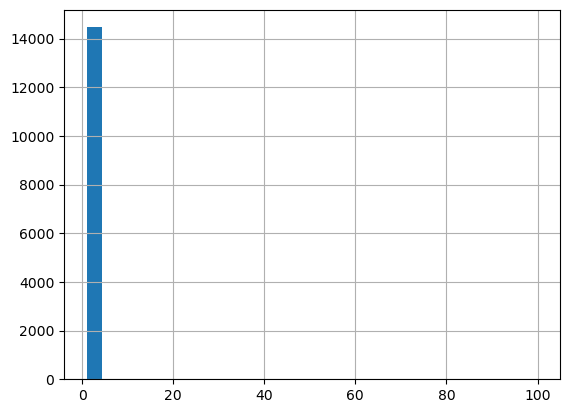

In [291]:
data['ceiling_height'].hist(bins=30)

In [292]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [293]:
data['ceiling_height'].isna().sum()

0

In [294]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,   3.7 ,
         2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,   3.6 ,
         2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,   2.79,
         2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,   4.7 ,
         2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,   3.35,
         2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,   3.83,
         3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,   3.85,
         3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,   3.08,
         3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,   2.81,
      

#### **Number of days listed**

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


<Axes: >

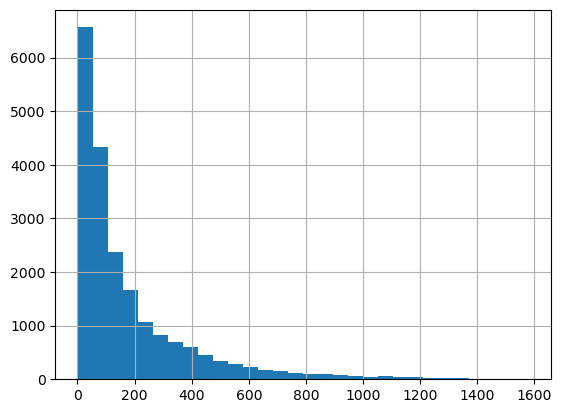

In [295]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins=30)

In [296]:
len(data.query('days_exposition > 365'))/len(data['days_exposition']) * 100

12.916156799864972

On average, a listing stays active for about six months, which looks plausible.  

However, the median is half that, meaning there are more long listings (but only ~3%). These should be treated as anomalies. The distribution looks normal, but very short and abnormally long listings should be reviewed.  

There are many outliers — possibly worth removing. First, let’s look at what these listings are like.  

<Axes: >

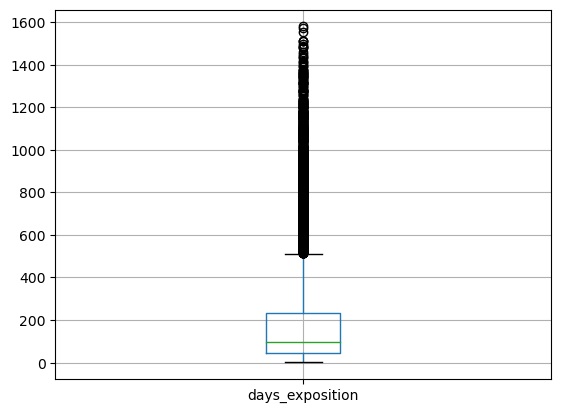

In [297]:
data.boxplot('days_exposition')

There are many outliers — possibly worth removing. First, let’s look at what these listings are like.  

In [298]:
data.query('days_exposition.isna()').head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0       108.0  2019-03-07T00:00:00      3   
7              5   7915000.0        71.6  2019-04-18T00:00:00      2   
44            13   5350000.0        40.0  2018-11-18T00:00:00      1   
45            17   5200000.0        50.6  2018-12-02T00:00:00      2   
46            17   6600000.0        52.1  2019-01-31T00:00:00      2   
49             1   3050000.0        30.8  2018-11-22T00:00:00      1   
52            20  11795000.0       136.0  2017-09-22T00:00:00      6   
71            20   4850000.0        57.5  2019-03-27T00:00:00      3   
81             9  10949000.0        68.0  2018-12-27T00:00:00      1   
84            11   2400000.0        43.9  2019-03-13T00:00:00      2   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70          16.0        51.00      8          NaN   False   
7             2.65          24.0          NaN     22          NaN   False   
44            2.65          22.0          NaN      3          NaN   False   
45            2.65           9.0        30.30      7          NaN   False   
46            2.60          24.0        29.70      9          NaN   False   
49            2.50           9.0        18.00      7          NaN   False   
52            3.00           2.0        94.00      2          NaN   False   
71            2.50           9.0        39.00      8          NaN   False   
81            2.65          10.0          NaN      6          NaN   False   
84            2.65           2.0        27.46      1          NaN   False   

    open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0       False          25.0        0  Санкт-Петербург           18863.0   
7       False          18.9        2  Санкт-Петербург           23982.0   
44      False           NaN        1  Санкт-Петербург           30471.0   
45      False           7.0        0  Санкт-Петербург           30011.0   
46      False           8.3        2  Санкт-Петербург           15114.0   
49      False           6.0        0  Санкт-Петербург           45341.0   
52      False          11.0        1  Санкт-Петербург           16510.0   
71      False           6.2        0  Санкт-Петербург           33623.0   
81      False           NaN        0  Санкт-Петербург               NaN   
84      False           5.2        0          Кировск               NaN   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0                 1          482.0                 2   
7               11634.0                 0            NaN                 0   
44              11603.0                 1          620.0                 1   
45              12872.0                 0            NaN                 0   
46              12702.0                 0            NaN                 0   
49              16603.0                 1          675.0                 0   
52               6582.0                 1          526.0                 0   
71              12267.0                 1          334.0                 1   
81                  NaN                 0            NaN                 0   
84                  NaN                 0            NaN                 0   

    ponds_nearest  days_exposition  
0           755.0              NaN  
7             NaN              NaN  
44         1152.0              NaN  
45            NaN              NaN  
46            NaN              NaN  
49            NaN              NaN  
52            NaN              NaN  
71          333.0              NaN  
81            NaN              NaN  
84            NaN              NaN

Potentially, they could be draft listings, but then they wouldn’t have a price at the time of removal. Missing values likely mean that the apartment was not yet sold, and the current price is valid as of the dataset extraction.  
It makes sense to remove only anomalies. But what should be considered an anomaly? The free posting period is 365 days; afterwards, the fee is 100 RUB/month in St. Petersburg — not high enough to prevent long listings.  

In [299]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce')

#### **Listing date:**  

In [300]:
# convert to standard format
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#2018-12-04T00:00:00
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

#### **Living area or kitchen area**  

It is incorrect to simply fill missing values in living or kitchen area with median/mean values, as this can create situations where the living area exceeds the total area.  
Instead, replace them with the median value for typical apartments with the same number of rooms.  

In [301]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

In [302]:
data['living_area'].isna().sum()

0

In [303]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [304]:
len(data.query('kitchen_area.isna() and open_plan == True'))

67

Assume that missing kitchen area values are zero if the apartment has an open floor plan.  
There are few such rows, but this will help reduce the number of missing values.  

In [305]:
data.loc[(data['open_plan'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
data.loc[data['open_plan'] == True, 'kitchen_area'] = 0

In [306]:
data['kitchen_area'].isna().sum()

2211

Fill the remaining kitchen area values the same way as living area — proportionally to the apartment type (number of rooms).  

In [307]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()

In [308]:
data['kitchen_area'].isna().sum()

0

#### **Total number of floors.**

In [309]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [310]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

The tallest building height looks suspicious, as St. Petersburg does not have many residential skyscrapers.  

In [311]:
data.sort_values(by='floors_total',ascending=False).head()

total_images  last_price  total_area first_day_exposition  rooms  \
2253             12   3800000.0        45.5           2018-06-28      2   
16731             9   3978000.0        40.0           2018-09-24      1   
16934             5   4100000.0        40.0           2017-10-17      1   
397              15   5990000.0        54.0           2018-03-22      2   
5807             17   8150000.0        80.0           2019-01-09      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2253             2.88          60.0         27.4      4          NaN   False   
16731            2.65          52.0         10.5     18          NaN   False   
16934            1.75          37.0         17.4      5          NaN   False   
397              2.65          36.0         21.4     28          NaN   False   
5807             2.70          36.0         41.0     13          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
2253       False          7.40        0        Кронштадт           67763.0   
16731      False         14.00        0  Санкт-Петербург           20728.0   
16934      False          8.34        0  Санкт-Петербург           18732.0   
397        False         18.70        1  Санкт-Петербург           18732.0   
5807       False         12.00        5  Санкт-Петербург           18732.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2253               49488.0                 2          342.0                 3   
16731              12978.0                 1          793.0                 0   
16934              20444.0                 0            NaN                 3   
397                20444.0                 0            NaN                 3   
5807               20444.0                 0            NaN                 3   

       ponds_nearest  days_exposition  
2253           614.0            166.0  
16731            NaN             45.0  
16934           80.0             71.0  
397             80.0             11.0  
5807            80.0             38.0

Let’s check how many such outliers exist.

In [312]:
#14+(14-5)*1.5
data.query('floors_total > 35').sort_values(by='floors_total',ascending=False).head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
2253             12   3800000.0        45.5           2018-06-28      2   
16731             9   3978000.0        40.0           2018-09-24      1   
16934             5   4100000.0        40.0           2017-10-17      1   
397              15   5990000.0        54.0           2018-03-22      2   
5807             17   8150000.0        80.0           2019-01-09      2   
11079            16   9200000.0        75.0           2019-02-22      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2253             2.88          60.0         27.4      4          NaN   False   
16731            2.65          52.0         10.5     18          NaN   False   
16934            1.75          37.0         17.4      5          NaN   False   
397              2.65          36.0         21.4     28          NaN   False   
5807             2.70          36.0         41.0     13          NaN   False   
11079            2.70          36.0         40.0     29          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
2253       False          7.40        0        Кронштадт           67763.0   
16731      False         14.00        0  Санкт-Петербург           20728.0   
16934      False          8.34        0  Санкт-Петербург           18732.0   
397        False         18.70        1  Санкт-Петербург           18732.0   
5807       False         12.00        5  Санкт-Петербург           18732.0   
11079      False         12.00        2  Санкт-Петербург           18732.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2253               49488.0                 2          342.0                 3   
16731              12978.0                 1          793.0                 0   
16934              20444.0                 0            NaN                 3   
397                20444.0                 0            NaN                 3   
5807               20444.0                 0            NaN                 3   
11079              20444.0                 0            NaN                 3   

       ponds_nearest  days_exposition  
2253           614.0            166.0  
16731            NaN             45.0  
16934           80.0             71.0  
397             80.0             11.0  
5807            80.0             38.0  
11079           80.0              NaN

In [313]:
len(data.query('floors_total > 27'))

54

There are only 53 such apartments, some clearly from the same building where floor counts were mixed up.  

The tallest residential building in St. Petersburg (RC Knyaz Nevsky) has 35 floors. There are two options:  
a) replace anomalous values with the average and keep the 53 rows;  
b) remove the rows.  

We’ll try to preserve data: change 60 floors to 6 (likely a typo, and Kronstadt has many elite low-rise properties), and remove the rest, since they make up less than 1%.  

In [314]:
data['floors_total'] = data['floors_total'].replace(60,6)

#### **Localities:**

In [315]:
# fill missing values with "unknown"
data['locality_name'] = data['locality_name'].fillna('unknown')

In [316]:
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [317]:
# many localities have different spellings, bring them to a consistent format:
data['locality_name'] = data['locality_name'].str.lower()

In [318]:
# function to rename some settlements
def name_changer(row):
        if 'поселок' in row:
            return row.replace('поселок','посёлок')
        if 'городск' in row:
            return row.replace('городской посёлок','посёлок городского типа')
        else: 
            return row

In [319]:
data['locality_name'] = data['locality_name'].apply(name_changer)

In [320]:
data['locality_name'].sort_values().unique()

array(['unknown', 'бокситогорск', 'волосово', 'волхов', 'всеволожск',
       'выборг', 'высоцк', 'гатчина', 'городской посёлок большая ижора',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко'

In [321]:
data['locality_name'] = data['locality_name'].replace('садовое товарищество новая ропша','посёлок ропша')

In [322]:
data['locality_name'] = data['locality_name'].replace('садовое товарищество рахья','посёлок городского типа рахья')

In [323]:
# second function to standardize names
def name_changer2(row):
        if 'посёлок городского типа' in row:
            return row.replace('посёлок городского типа','посёлок')
        else: 
            return row

In [324]:
data['locality_name'] = data['locality_name'].apply(name_changer2)

In [325]:
data['locality_name'].sort_values().unique()

array(['unknown', 'бокситогорск', 'волосово', 'волхов', 'всеволожск',
       'выборг', 'высоцк', 'гатчина', 'городской посёлок большая ижора',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко'

**Now let’s consider columns without missing values but with potential anomalies.**

#### **Total area**

In [326]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

The maximum value looks anomalous, while the minimum is less critical. The mean looks adequate.  

<Axes: >

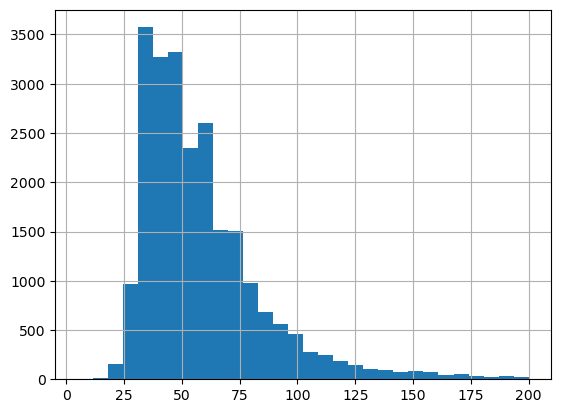

In [327]:
data['total_area'].hist(bins=30,range=(5,200))

Values above 200 m² are rare — let’s check how many there are.  

<Axes: >

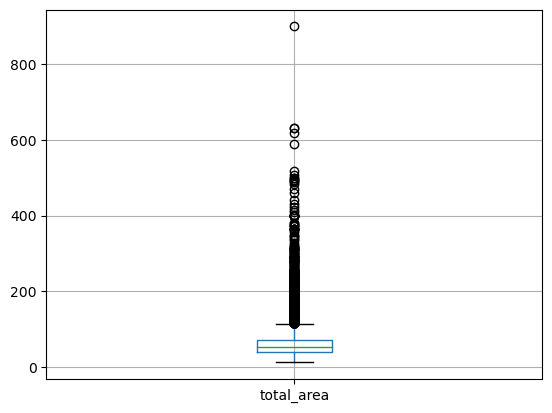

In [328]:
#data.pivot_table(index=data.index.values,values='total_area',aggfunc='mean').boxplot()
data.boxplot('total_area')

In [329]:
len(data[data['total_area'] > 175])/len(data['total_area']) * 100

1.4346596902822906

Such rows make up about 1%, so they can be removed.  

#### **Final price when the listing was removed:**  

In [330]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<Axes: >

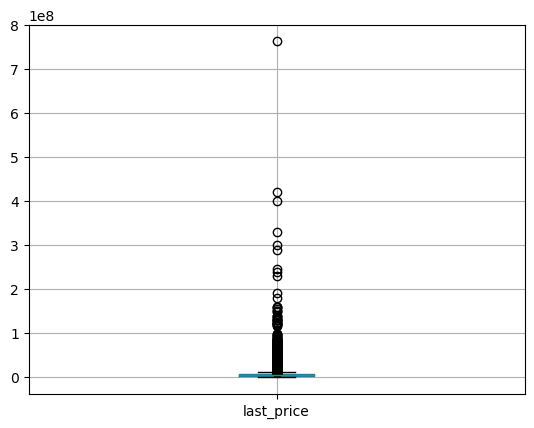

In [331]:
data.boxplot('last_price')

From the chart it’s unclear where the outliers are, but there are many of them — let’s count them directly.  

In [332]:
6800000+(6800000-3400000)*1.5

11900000.0

Everything above 12 million can be considered an outlier. Let’s check how many such values exist.  

In [333]:
data.query('last_price > 12000000').sort_values(by='total_area')

total_images   last_price  total_area first_day_exposition  rooms  \
22869             0   15000000.0       25.00           2018-07-25      1   
17172            14   28000000.0       33.00           2019-04-30      1   
4859             16   28000000.0       33.00           2019-04-29      1   
21238             1   24412900.0       38.12           2018-06-27      1   
8712              6   14948000.0       42.70           2017-09-15      2   
...             ...          ...         ...                  ...    ...   
5358             20   65000000.0      590.00           2019-02-14     15   
15651            20  300000000.0      618.00           2017-12-18      7   
3117             19  140000000.0      631.00           2019-03-30      7   
12859            20  140000000.0      631.20           2019-04-09      7   
19540             8  420000000.0      900.00           2017-12-06     12   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22869          100.00           5.0        14.00      5         True   False   
17172            3.50           5.0        17.60      2          NaN   False   
4859             3.50           5.0        17.60      2          NaN   False   
21238            2.65          10.0        16.83      4        False   False   
8712             2.80           4.0        27.50      4          NaN   False   
...               ...           ...          ...    ...          ...     ...   
5358             3.50           6.0       409.00      3          NaN   False   
15651            3.40           7.0       258.00      5          NaN   False   
3117             2.65           5.0       145.00      5          NaN   False   
12859            3.90           4.0       322.30      4          NaN   False   
19540            2.80          25.0       409.70     25          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
22869      False        11.000        5  санкт-петербург           34963.0   
17172      False         9.005        0  санкт-петербург           23403.0   
4859       False         9.005        0  санкт-петербург           23447.0   
21238      False        10.700        1       всеволожск               NaN   
8712       False         3.700        0  санкт-петербург           25212.0   
...          ...           ...      ...              ...               ...   
5358       False       100.000        0  санкт-петербург           24447.0   
15651      False        70.000        0  санкт-петербург           32440.0   
3117       False        60.000        0  санкт-петербург           25707.0   
12859      False        19.500        1  санкт-петербург           25707.0   
19540      False       112.000        0  санкт-петербург           30706.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
22869               8283.0                 1          223.0                 3   
17172               1462.0                 3          342.0                 3   
4859                1376.0                 3          344.0                 3   
21238                  NaN                 0            NaN                 0   
8712                3914.0                 1          290.0                 1   
...                    ...               ...            ...               ...   
5358                4666.0                 1          767.0                 0   
15651               5297.0                 0            NaN                 2   
3117                4972.0                 0            NaN                 2   
12859               4972.0                 0            NaN                 2   
19540               7877.0                 0            NaN                 2   

       ponds_nearest  days_exposition  
22869           30.0             19.0  
17172           27.0              NaN  
4859           119.0              NaN  
21238            NaN             44.0  
8712           860.0   

Almost 2,000 records — we won’t delete all of them. Many expensive apartments have an area less than 175 m² (which we previously flagged as anomalously large). Let’s see how many remain after cleaning total area outliers.  

In [334]:
len(data.query('last_price > 12000000 and total_area < 175').sort_values(by='total_area'))

1607

Still quite a lot. Yandex.Realty does indeed list expensive apartments above 300 m², but those also have a large area (300 m²+). Therefore, it makes sense to clean the dataset based on price per square meter instead. For now, we will keep these “anomalies” as they are.  

Change the data type, since fractional parts of prices are unlikely to be needed for analysis.  

In [335]:
data['last_price'] = data['last_price'].astype('int')

Remove all previously mentioned anomalous/rare values:  

In [336]:
data = data.query('(floors_total < 36) and (2 < ceiling_height < 5) and (36 < total_area < 175)')
data.reset_index(drop=True)

total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000      108.00           2019-03-07      3   
1                 7     3350000       40.40           2018-12-04      1   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
19157             9     4600000       62.40           2016-08-05      3   
19158             9     9700000      133.81           2017-03-21      3   
19159            14     3100000       59.00           2018-01-15      3   
19160            18     2500000       56.70           2018-02-11      2   
19161            13    11475000       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                2.70          16.0         51.0      8          NaN   False   
1                2.65          11.0         18.6      1          NaN   False   
2                2.65           5.0         34.3      4          NaN   False   
3                2.65          14.0         45.0      9          NaN   False   
4                3.03          14.0         32.0     13          NaN   False   
...               ...           ...          ...    ...          ...     ...   
19157            2.60           9.0         40.0      8          NaN   False   
19158            3.70           5.0         73.3      3          NaN   False   
19159            2.65           5.0         38.0      4          NaN   False   
19160            2.65           3.0         29.7      1          NaN   False   
19161            3.00          17.0         30.5     12          NaN   False   

       open_plan  kitchen_area  balcony     locality_name  airports_nearest  \
0          False         25.00        0   санкт-петербург           18863.0   
1          False         11.00        2    посёлок шушары           12817.0   
2          False          8.30        0   санкт-петербург           21741.0   
3          False          9.50        0   санкт-петербург           28098.0   
4          False         41.00        0   санкт-петербург           31856.0   
...          ...           ...      ...               ...               ...   
19157      False          8.00        0          петергоф           45602.0   
19158      False         13.83        0   санкт-петербург           24665.0   
19159      False          8.50        0             тосно               NaN   
19160      False          8.80        0  село рождествено               NaN   
19161      False         23.30        2   санкт-петербург           39140.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0                  16028.0                 1          482.0                 2   
1                  18603.0                 0            NaN                 0   
2                  13933.0                 1           90.0                 2   
3                   6800.0                 2           84.0                 3   
4                   8098.0                 2          112.0                 1   
...                    ...               ...            ...               ...   
19157              34104.0                 1          352.0                 1   
19158               4232.0                 1          796.0                 3   
19159                  NaN                 0            NaN                 0   
19160                  NaN                 0            NaN                 0   
19161              10364.0                 2          173.0                 3   

       ponds_nearest  days_exposition  
0              755.0              NaN  
1                NaN             81.0  
2              574.0            558.0  
3              234.0            424.0  
4               48.0   

In [337]:
# check if the slicing was done correctly
data.query('2 > ceiling_height < 5')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

In [338]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19162 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19162 non-null  int64         
 1   last_price            19162 non-null  int64         
 2   total_area            19162 non-null  float64       
 3   first_day_exposition  19162 non-null  datetime64[ns]
 4   rooms                 19162 non-null  int64         
 5   ceiling_height        19162 non-null  float64       
 6   floors_total          19162 non-null  float64       
 7   living_area           19162 non-null  float64       
 8   floor                 19162 non-null  int64         
 9   is_apartment          2310 non-null   object        
 10  studio                19162 non-null  bool          
 11  open_plan             19162 non-null  bool          
 12  kitchen_area          19162 non-null  float64       
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            16852
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4188
cityCenters_nearest      4168
parks_around3000            0
parks_nearest           12443
ponds_around3000            0
ponds_nearest           11653
days_exposition          2706
dtype: int64

#### **During preprocessing:**  

1. Missing values in most quantitative columns (except mapping data) were filled with the median.  
2. Missing values in living area and kitchen area were filled with the median of 1/2/3-room apartments, respectively.  
3. Locality names were standardized (city name, settlement+Name, gardening partnership+Name, village+Name, selo+Name). Missing values were filled with "unknown".  
4. Rows with anomalous values were removed in the following columns:  
   1. Anomalously high/low ceiling height (below 2 m and above 5 m).  
   2. Anomalous building floor count (above 36).  
   3. Rare values of total area (above 175 m²).  


### Calculate and add new columns

At the preprocessing stage, it was necessary to define what counts as an anomalous price. In absolute terms, this cannot be determined — we need to know the average price per m².  

In [339]:
data['meter_price'] = (data['last_price'] / data['total_area']).round()

In [340]:
data['meter_price'].describe()
data

total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000      108.00           2019-03-07      3   
1                 7     3350000       40.40           2018-12-04      1   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23693             9     4600000       62.40           2016-08-05      3   
23694             9     9700000      133.81           2017-03-21      3   
23695            14     3100000       59.00           2018-01-15      3   
23696            18     2500000       56.70           2018-02-11      2   
23697            13    11475000       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                2.70          16.0         51.0      8          NaN   False   
1                2.65          11.0         18.6      1          NaN   False   
2                2.65           5.0         34.3      4          NaN   False   
3                2.65          14.0         45.0      9          NaN   False   
4                3.03          14.0         32.0     13          NaN   False   
...               ...           ...          ...    ...          ...     ...   
23693            2.60           9.0         40.0      8          NaN   False   
23694            3.70           5.0         73.3      3          NaN   False   
23695            2.65           5.0         38.0      4          NaN   False   
23696            2.65           3.0         29.7      1          NaN   False   
23697            3.00          17.0         30.5     12          NaN   False   

       open_plan  kitchen_area  balcony     locality_name  airports_nearest  \
0          False         25.00        0   санкт-петербург           18863.0   
1          False         11.00        2    посёлок шушары           12817.0   
2          False          8.30        0   санкт-петербург           21741.0   
3          False          9.50        0   санкт-петербург           28098.0   
4          False         41.00        0   санкт-петербург           31856.0   
...          ...           ...      ...               ...               ...   
23693      False          8.00        0          петергоф           45602.0   
23694      False         13.83        0   санкт-петербург           24665.0   
23695      False          8.50        0             тосно               NaN   
23696      False          8.80        0  село рождествено               NaN   
23697      False         23.30        2   санкт-петербург           39140.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0                  16028.0                 1          482.0                 2   
1                  18603.0                 0            NaN                 0   
2                  13933.0                 1           90.0                 2   
3                   6800.0                 2           84.0                 3   
4                   8098.0                 2          112.0                 1   
...                    ...               ...            ...               ...   
23693              34104.0                 1          352.0                 1   
23694               4232.0                 1          796.0                 3   
23695                  NaN                 0            NaN                 0   
23696                  NaN                 0            NaN                 0   
23697              10364.0                 2          173.0                 3   

       ponds_nearest  days_exposition  meter_price  
0              755.0              NaN     120370.0  
1                NaN             81.0      82921.0  
2              574.0            558.0      92786.0  
3          

<Axes: >

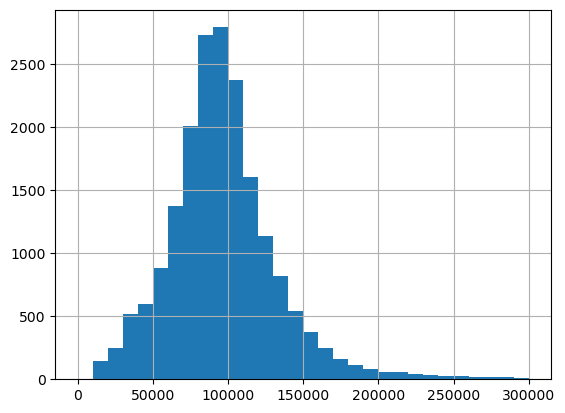

In [341]:
data['meter_price'].hist(range=(0,300000),bins=30)

In [342]:
data['meter_price'] = data['meter_price'].astype('int').round()

Add columns for the day of the week, month, and year when the listing was published.  

In [343]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [344]:
data['month'] = data['first_day_exposition'].dt.month

In [345]:
data['year'] = data['first_day_exposition'].dt.year

Add a column for the apartment floor type.  

In [346]:
def categorize_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'Первый этаж'
        if floor == floors_total:
            return 'Последний этаж'
        else:
            return 'Другой'
    except:
        pass   

In [347]:
data['floor_category'] = data.apply(categorize_floor, axis=1)

In [348]:
data['city_center_km'] = (data['cityCenters_nearest'] / 1000).round()
data['city_center_km'] = pd.to_numeric(data['city_center_km'], errors='coerce')

### Perform exploratory data analysis  

#### **Which parameters correlate most with apartment price:**  

In [349]:
(data.corr()).query('last_price > 0.2').sort_values(by='last_price',ascending=False).head()

/var/folders/0p/6cn9nyyd3zvgt2s7ftgpcj200000gn/T/ipykernel_48404/308755709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (data.corr()).query('last_price > 0.2').sort_values(by='last_price',ascending=False).head()


total_images  last_price  total_area     rooms  ceiling_height  \
last_price        0.121918    1.000000    0.697338  0.347855        0.356449   
meter_price       0.134657    0.821603    0.279319 -0.025962        0.296963   
total_area        0.092954    0.697338    1.000000  0.726496        0.368276   
living_area       0.080215    0.529527    0.884652  0.856377        0.305498   
kitchen_area      0.087752    0.513736    0.505614  0.089968        0.291340   

              floors_total  living_area     floor    studio  open_plan  \
last_price        0.049584     0.529527  0.058358  0.003116   0.013777   
meter_price       0.182691     0.123876  0.149758  0.011711   0.009193   
total_area       -0.042266     0.884652 -0.015755 -0.004825   0.002402   
living_area      -0.190631     1.000000 -0.126047  0.000859   0.006552   
kitchen_area      0.195403     0.230714  0.148093 -0.038732  -0.043920   

              kitchen_area   balcony  airports_nearest  cityCenters_nearest  \
last_price        0.513736  0.011523         -0.031362            -0.309011   
meter_price       0.378390  0.024467         -0.031768            -0.351468   
total_area        0.505614  0.007729         -0.031620            -0.238880   
living_area       0.230714 -0.026218         -0.065893            -0.212213   
kitchen_area      1.000000  0.053582          0.014509            -0.165103   

              parks_around3000  parks_nearest  ponds_around3000  \
last_price            0.287105      -0.014675          0.294033   
meter_price           0.309478       0.020018          0.323651   
total_area            0.200877      -0.022558          0.201348   
living_area           0.194935      -0.070101          0.152786   
kitchen_area          0.099880       0.030542          0.155880   

              ponds_nearest  days_exposition  meter_price   weekday     month  \
last_price        -0.122338         0.114984     0.821603 -0.012926  0.005294   
meter_price       -0.110394         0.050541     1.000000 -0.012083  0.002210   
total_area        -0.101374         0.160963     0.279319 -0.016506  0.007066   
living_area       -0.069937         0.138175     0.123876 -0.013090 -0.004711   
kitchen_area      -0.093837         0.092762     0.378390 -0.017564  0.004828   

                  year  city_center_km  
last_price   -0.042125       -0.309621  
meter_price   0.012610       -0.352198  
total_area   -0.083996       -0.239238  
living_area  -0.068424       -0.212258  
kitchen_area -0.045628       -0.165797

In [350]:
(data.corr()).query('last_price < 0').sort_values(by='last_price').head()

/var/folders/0p/6cn9nyyd3zvgt2s7ftgpcj200000gn/T/ipykernel_48404/2411824740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (data.corr()).query('last_price < 0').sort_values(by='last_price').head()


total_images  last_price  total_area     rooms  \
city_center_km          -0.031264   -0.309621   -0.239238 -0.141542   
cityCenters_nearest     -0.031759   -0.309011   -0.238880 -0.141767   
ponds_nearest            0.008519   -0.122338   -0.101374 -0.044403   
year                     0.153198   -0.042125   -0.083996 -0.040582   
airports_nearest         0.000018   -0.031362   -0.031620 -0.071034   

                     ceiling_height  floors_total  living_area     floor  \
city_center_km            -0.296782      0.033885    -0.212258  0.019580   
cityCenters_nearest       -0.296382      0.034502    -0.212213  0.020002   
ponds_nearest             -0.108859      0.054894    -0.069937  0.042954   
year                      -0.043882      0.014475    -0.068424  0.015631   
airports_nearest          -0.084613      0.125007    -0.065893  0.087001   

                       studio  open_plan  kitchen_area   balcony  \
city_center_km      -0.013264  -0.002993     -0.165797  0.079490   
cityCenters_nearest -0.013080  -0.003596     -0.165103  0.079129   
ponds_nearest        0.007060  -0.010278     -0.093837  0.024171   
year                 0.001290  -0.032621     -0.045628  0.008907   
airports_nearest    -0.004830  -0.006580      0.014509  0.058739   

                     airports_nearest  cityCenters_nearest  parks_around3000  \
city_center_km               0.271142             0.999440         -0.178676   
cityCenters_nearest          0.270743             1.000000         -0.177802   
ponds_nearest                0.012267             0.038810         -0.181491   
year                         0.020674             0.031294         -0.050043   
airports_nearest             1.000000             0.270743         -0.009426   

                     parks_nearest  ponds_around3000  ponds_nearest  \
city_center_km           -0.037088         -0.095025       0.040879   
cityCenters_nearest      -0.037483         -0.093216       0.038810   
ponds_nearest             0.001721         -0.347964       1.000000   
year                     -0.023883         -0.052529       0.035571   
airports_nearest         -0.056206         -0.048899       0.012267   

                     days_exposition  meter_price   weekday     month  \
city_center_km             -0.060505    -0.352198  0.005384 -0.009444   
cityCenters_nearest        -0.060605    -0.351468  0.005685 -0.009221   
ponds_nearest              -0.080283    -0.110394 -0.005884  0.015335   
year                       -0.615812     0.012610 -0.003294 -0.270810   
airports_nearest           -0.025471    -0.031768 -0.001568 -0.000853   

                         year  city_center_km  
city_center_km       0.031523        1.000000  
cityCenters_nearest  0.031294        0.999440  
ponds_nearest        0.035571        0.040879  
year                 1.000000        0.031523  
airports_nearest     0.020674        0.271142

#### **Price per square meter**  

As expected, this correlates the most with overall price. Let’s see what can be considered an anomaly.  

count     19162.000000
mean      98211.983144
std       44277.089091
min         112.000000
25%       75532.500000
50%       93643.500000
75%      113953.000000
max      995984.000000
Name: meter_price, dtype: float64


<Axes: >

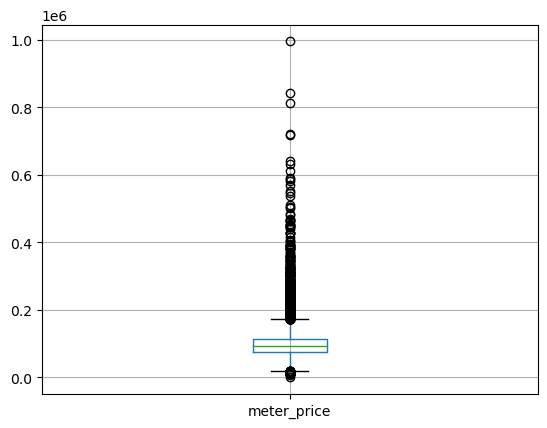

In [351]:
print(data['meter_price'].describe())
data.boxplot('meter_price')

In [352]:
print('Average price per square meter:', data['meter_price'].mean().round()) 

Average price per square meter: 98212.0


According to the boxplot, there are many outliers, so it’s worth removing anomalously high and low values.

In [353]:
print('Upper outlier threshold:', 113553+(113553-76362)*1.5, 'rubles per square meter')

Upper outlier threshold: 169339.5 rubles per square meter


In [354]:
print('Lower outlier threshold:', 76362-(113553-76362)*1.5, 'rubles per square meter')

Lower outlier threshold: 20575.5 rubles per square meter


<Axes: xlabel='total_area', ylabel='meter_price'>

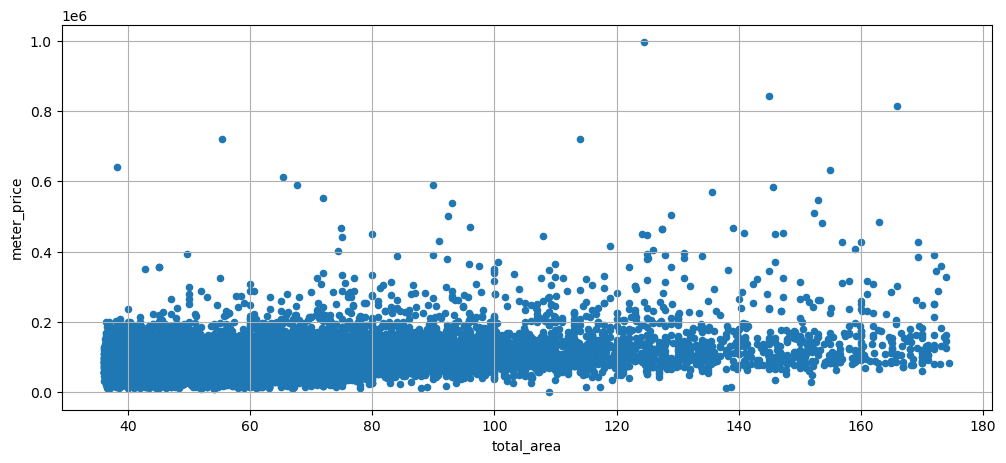

In [355]:
# build a scatter plot of price per square meter values
(data
#    .pivot_table(index='total_area',values=['meter_price',aggfunc='mean')
    .plot(y='meter_price', x='total_area',grid=True, figsize=(12, 5),kind='scatter')
)

**Conclusion:**  
1. There are outliers in price, and the plot is uneven.  
2. For apartments up to 120 m², the price per square meter is more stable.  
3. There are more upper outliers than lower ones.  

Remove obvious outliers:  

We will treat all values above 200,000 RUB per square meter as obvious outliers. Such values make up less than 2%. 

In [356]:
len(data.query('meter_price > 200000'))/len(data['meter_price'])*100

2.056152802421459

Next, look at outliers below the IQR lower bound.  

In [357]:
len(data.query('meter_price < 20575'))/len(data['meter_price'])*100

0.8245485857426157

These values account for less than 1%, so they can also be removed.  

In [358]:
# review them once more  
data.query('meter_price < 20575').sort_values(by='meter_price').head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
8793              7       12190       109.0           2019-03-20      2   
14911             5      430000        54.0           2018-06-26      2   
4405              9      500000        52.0           2018-08-02      2   
11351            17      550000        54.0           2019-02-07      2   
9581              7      450000        43.4           2018-08-31      2   
23477             3     1450000       138.0           2018-07-06      3   
23484            11      470000        44.5           2018-07-02      2   
5698              7      450000        42.0           2017-07-31      2   
19460            13      560000        52.0           2017-11-21      2   
9471              4      850000        78.0           2017-05-04      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8793             2.75          25.0         32.0     25          NaN   False   
14911            2.65           3.0         30.5      3          NaN   False   
4405             2.70           2.0         31.0      1          NaN   False   
11351            3.00           2.0         40.0      1          NaN   False   
9581             2.65           5.0         30.3      3          NaN   False   
23477            2.65           2.0         58.0      2          NaN   False   
23484            2.65           2.0         28.0      2          NaN   False   
5698             2.65           1.0         23.0      1          NaN   False   
19460            3.00           3.0         30.0      3          NaN   False   
9471             2.65           9.0         12.5      7          NaN   False   

       open_plan  kitchen_area  balcony          locality_name  \
8793       False          40.5        0        санкт-петербург   
14911      False           8.8        0  посёлок станции свирь   
4405       False           8.0        0                 сланцы   
11351      False           7.5        0                 сланцы   
9581       False           5.5        0     деревня старополье   
23477      False          12.0        0                гатчина   
23484      False           7.5        0                 сланцы   
5698       False           5.8        0       посёлок будогощь   
19460      False           6.0        0                 сланцы   
9471       False           8.5        0                гатчина   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
8793            36421.0               9176.0                 1          805.0   
14911               NaN                  NaN                 0            NaN   
4405                NaN                  NaN                 0            NaN   
11351               NaN                  NaN                 0            NaN   
9581                NaN                  NaN                 0            NaN   
23477               NaN                  NaN                 0            NaN   
23484               NaN                  NaN                 0            NaN   
5698                NaN                  NaN                 0            NaN   
19460               NaN                  NaN                 0            NaN   
9471                NaN                  NaN                 0            NaN   

       ponds_around3000  ponds_nearest  days_exposition  meter_price  weekday  \
8793                  0            NaN              8.0          112        2   
14911                 0            NaN             44.0         7963        1   
4405                  0            NaN            110.0         9615        3   
11351                 0            NaN             78.0        10185        3   
9581                  0            NaN             96.0        10369        4   
23477                 0            NaN             52.0        10507        4   
23484                 0            NaN            298.0        10562        0   
5698                  0          

There is no general pattern in the low values — no obvious data entry errors that could be corrected. We will simply treat these rows as outliers.  

In [359]:
good_data = data.query('meter_price < 200000 and meter_price > 20575')
good_data.reset_index(drop=True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18595 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18595 non-null  int64         
 1   last_price            18595 non-null  int64         
 2   total_area            18595 non-null  float64       
 3   first_day_exposition  18595 non-null  datetime64[ns]
 4   rooms                 18595 non-null  int64         
 5   ceiling_height        18595 non-null  float64       
 6   floors_total          18595 non-null  float64       
 7   living_area           18595 non-null  float64       
 8   floor                 18595 non-null  int64         
 9   is_apartment          2243 non-null   object        
 10  studio                18595 non-null  bool          
 11  open_plan             18595 non-null  bool          
 12  kitchen_area          18595 non-null  float64       
 13  balcony         

<Axes: xlabel='total_area', ylabel='meter_price'>

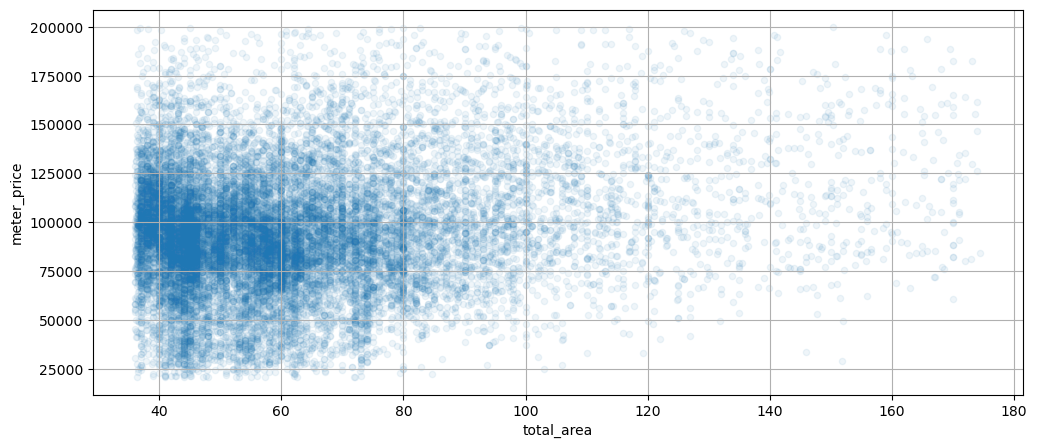

In [360]:
# check how the scatter plot changed  
(good_data
#.pivot_table(index='total_area',values='meter_price',aggfunc='mean')
.plot(y='meter_price', x='total_area',grid=True, figsize=(12, 5),kind='scatter',alpha=0.07)
#.plot(y='meter_price', x='total_area',kind='hexbin', gridsize=20, figsize=(12, 5), sharex=False, grid=True,)
)

**Conclusion:**  
1. The scatter plot became more uniform, values look plausible.  
2. Most apartments are in the range of 30–60 m².  
3. Most apartments are priced between 75,000–125,000 RUB per square meter. 

Now, let’s see **how price per square meter correlates with final price:** 

<Axes: xlabel='meter_price', ylabel='last_price'>

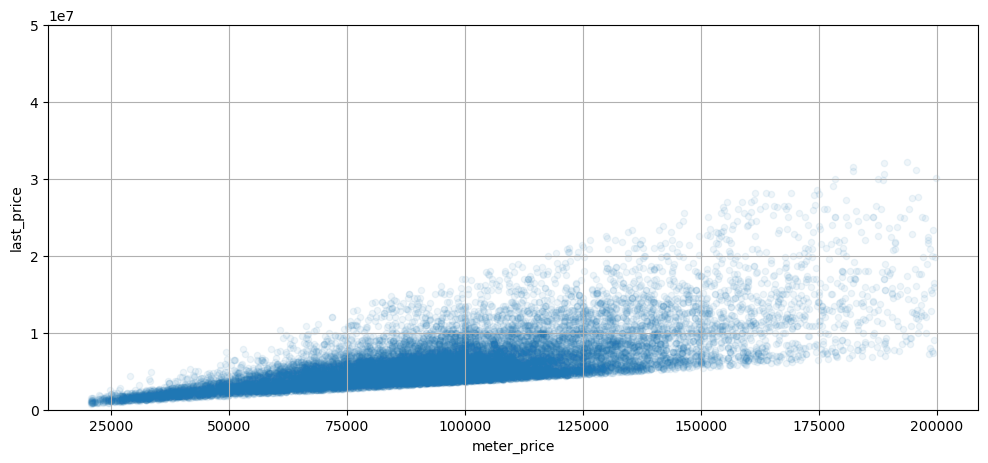

In [361]:
(good_data
#.pivot_table(index='total_area',values='meter_price',aggfunc='mean')
.plot(y='last_price', x='meter_price',grid=True, figsize=(12, 5),kind='scatter',alpha=0.07,ylim=(0,50000000))
)

**Conclusion:**  

1. The plot shows that, overall, price per m² and final sale price have a linear relationship with positive correlation.  
2. Most apartment sales occur at the market price per square meter.  
3. After 125,000 RUB per m² (above average), the sale price varies more and likely depends on other factors.  

Look at how price per m² affects the number of attached photos.  

<Axes: xlabel='total_images'>

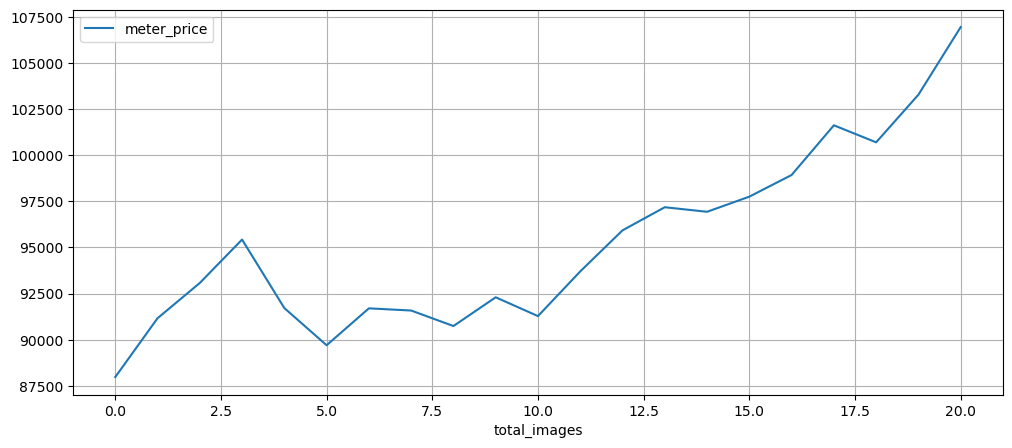

In [362]:
(good_data
 .query('total_images <= 20')
 .pivot_table(index='total_images',values='meter_price')
 .plot(grid=True, figsize=(12, 5))
)

**Conclusion:**  
1. Apartments with a higher price per square meter tend to have more photos in the listing.  

#### **Living area:**  

<Axes: >

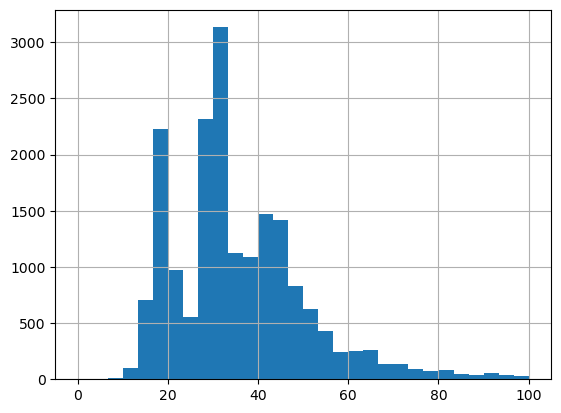

In [363]:
good_data['living_area'].hist(bins=30,range=(0,100))

The distribution has several gaps. This may indicate that apartments with such living areas are atypical, or that missing values and outliers affect the distribution.  

Hypothesis: The jumps in the living area distribution are caused by the typical room sizes and, accordingly, the number of rooms in an apartment. Also, earlier we filled missing values with the median for each apartment type (1-room, 2-room, etc.).  

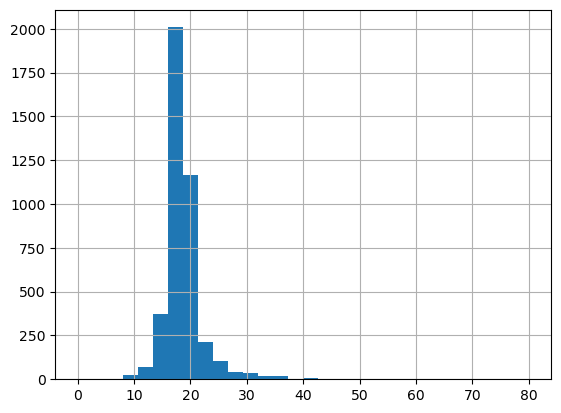

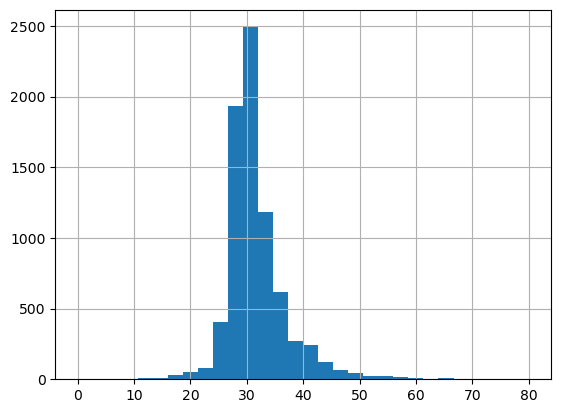

<Axes: >

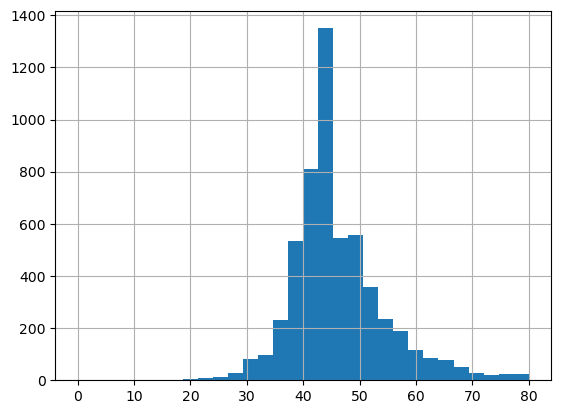

In [364]:
# histogram for 1-room apartments
good_data.query('rooms == 1')['living_area'].hist(range=(0,80),bins=30)
plt.show()
# histogram for 2-room apartments
good_data.query('rooms == 2')['living_area'].hist(range=(0,80),bins=30)
plt.show()
# histogram for 3-room apartments
good_data.query('rooms == 3')['living_area'].hist(range=(0,80),bins=30)

The hypothesis is confirmed: the distribution of living area is normal within each group of apartments by room count.

In [365]:
# check the share of living area compared to total area
print(
    'Average share of living area from total:',
    (good_data['living_area'].mean() / good_data['total_area'].mean() * 100).round(),
    '%'
)

Average share of living area from total: 58.0 %


It’s interesting to see how living and total area correlate.

<Axes: xlabel='total_area', ylabel='living_area'>

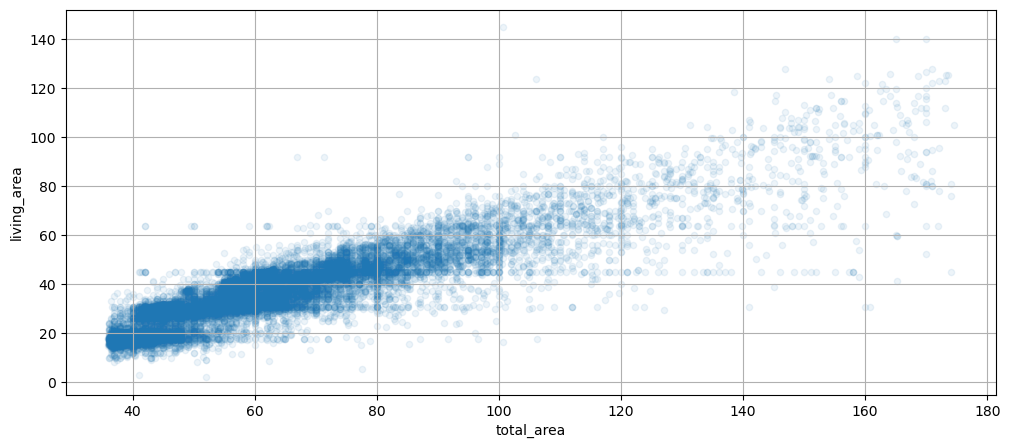

In [366]:
(good_data
    .plot(y='living_area', x='total_area',grid=True, figsize=(12, 5),kind='scatter',alpha=0.08)
)

**Conclusion:**

1. There are apartments where the living area is larger than the total area. These anomalous values should likely be removed.  
2. In most cases, the living area corresponds to the total area (about 20 m² smaller). After 120 m² of total area, the relationship may vary. This is logical, since large apartments may include many additional spaces (large bathrooms, terraces, storage rooms, walk-in closets).  

In [367]:
# remove rows where living area is greater than total area
print(len(good_data.query('living_area > total_area')))
good_data = good_data.query('living_area < total_area')
good_data.reset_index(drop=True)

22


total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000      108.00           2019-03-07      3   
1                 7     3350000       40.40           2018-12-04      1   
2                10     5196000       56.00           2015-08-20      2   
3                 2    10000000      100.00           2018-06-19      2   
4                 6     3700000       37.30           2017-11-02      1   
...             ...         ...         ...                  ...    ...   
18568             9     4600000       62.40           2016-08-05      3   
18569             9     9700000      133.81           2017-03-21      3   
18570            14     3100000       59.00           2018-01-15      3   
18571            18     2500000       56.70           2018-02-11      2   
18572            13    11475000       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                2.70          16.0         51.0      8          NaN   False   
1                2.65          11.0         18.6      1          NaN   False   
2                2.65           5.0         34.3      4          NaN   False   
3                3.03          14.0         32.0     13          NaN   False   
4                2.65          26.0         10.6      6          NaN   False   
...               ...           ...          ...    ...          ...     ...   
18568            2.60           9.0         40.0      8          NaN   False   
18569            3.70           5.0         73.3      3          NaN   False   
18570            2.65           5.0         38.0      4          NaN   False   
18571            2.65           3.0         29.7      1          NaN   False   
18572            3.00          17.0         30.5     12          NaN   False   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
0          False         25.00        0    санкт-петербург           18863.0   
1          False         11.00        2     посёлок шушары           12817.0   
2          False          8.30        0    санкт-петербург           21741.0   
3          False         41.00        0    санкт-петербург           31856.0   
4          False         14.40        1  посёлок парголово           52996.0   
...          ...           ...      ...                ...               ...   
18568      False          8.00        0           петергоф           45602.0   
18569      False         13.83        0    санкт-петербург           24665.0   
18570      False          8.50        0              тосно               NaN   
18571      False          8.80        0   село рождествено               NaN   
18572      False         23.30        2    санкт-петербург           39140.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0                  16028.0                 1          482.0                 2   
1                  18603.0                 0            NaN                 0   
2                  13933.0                 1           90.0                 2   
3                   8098.0                 2          112.0                 1   
4                  19143.0                 0            NaN                 0   
...                    ...               ...            ...               ...   
18568              34104.0                 1          352.0                 1   
18569               4232.0                 1          796.0                 3   
18570                  NaN                 0            NaN                 0   
18571                  NaN                 0            NaN                 0   
18572              10364.0                 2          173.0                 3   

       ponds_nearest  days_exposition  meter_price  weekday  month  year  \
0              755.0              NaN       120370        3      3  2019   
1                NaN             81.0        82921        1

<Axes: xlabel='living_area'>

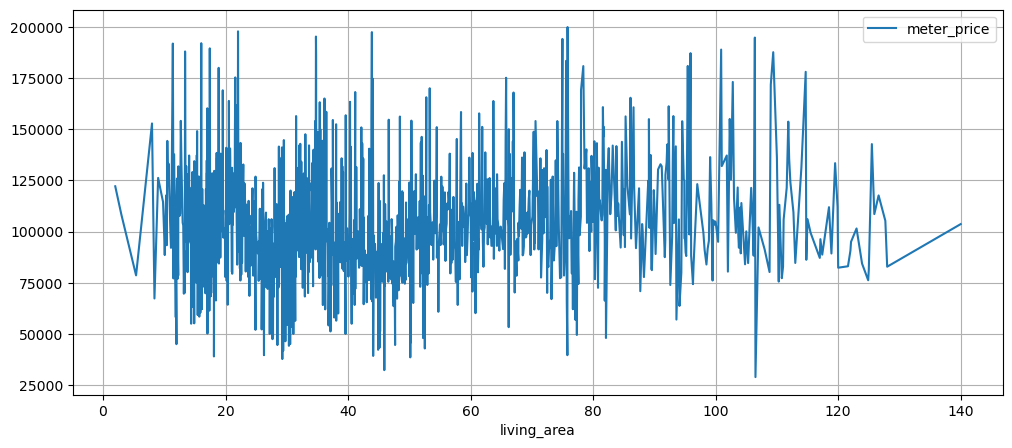

In [368]:
good_data.pivot_table(index='living_area',values='meter_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusion:**

1. There is no direct relationship between living area and price per m².  
2. After 120 m², the price range becomes more uniform again.  

#### **Total area:**

<Axes: xlabel='total_area'>

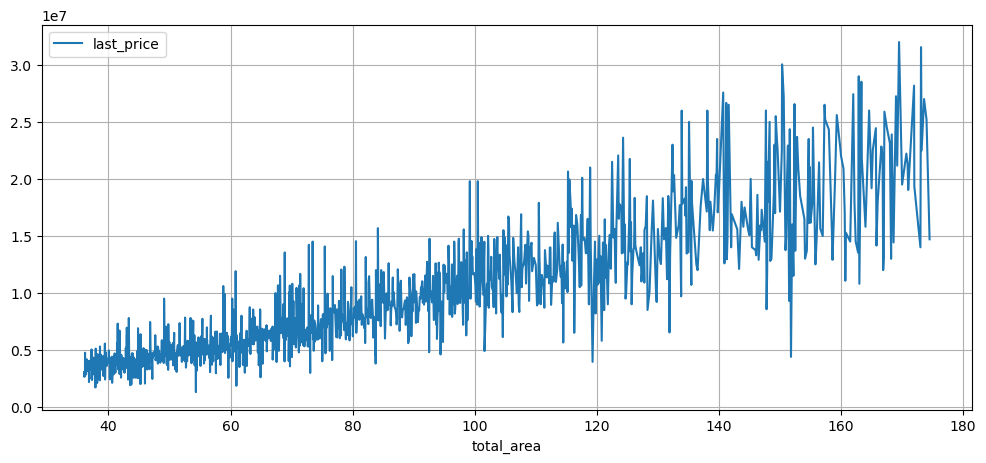

In [369]:
good_data.pivot_table(index='total_area',values='last_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusion:**

1. There is a clear tendency for price to increase as the total apartment area increases.  
2. Between 40 m² and 80 m², the relationship is more linear; after 120 m², the price becomes more scattered.  

#### **Kitchen area:**

In [370]:
# check the average share of kitchen area from total  
print('Average share of kitchen area from total:', (good_data['kitchen_area'].mean()/good_data['total_area'].mean()*100).round(),'%')

Average share of kitchen area from total: 17.0 %


<Axes: xlabel='kitchen_area'>

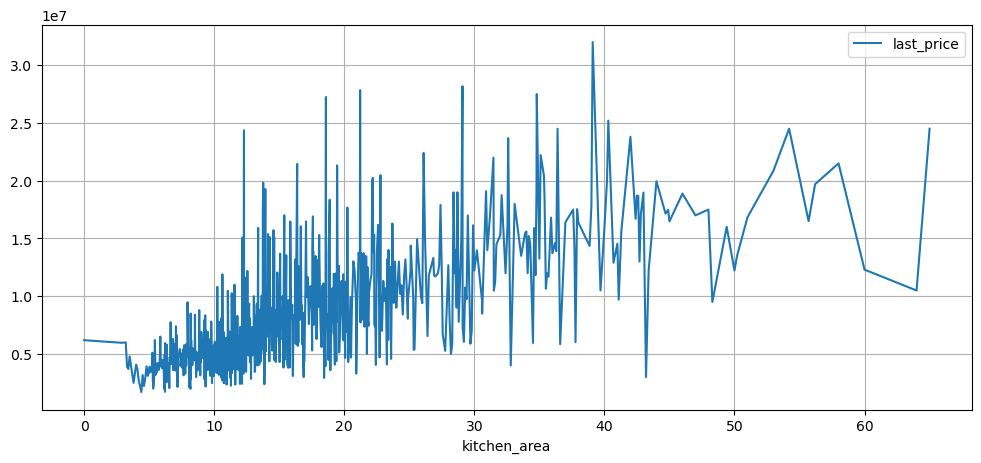

In [371]:
good_data.pivot_table(index='kitchen_area',values='last_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusion:**
 1. There is no direct relationship between kitchen area and apartment price.

#### **Number of rooms**

<Axes: xlabel='rooms'>

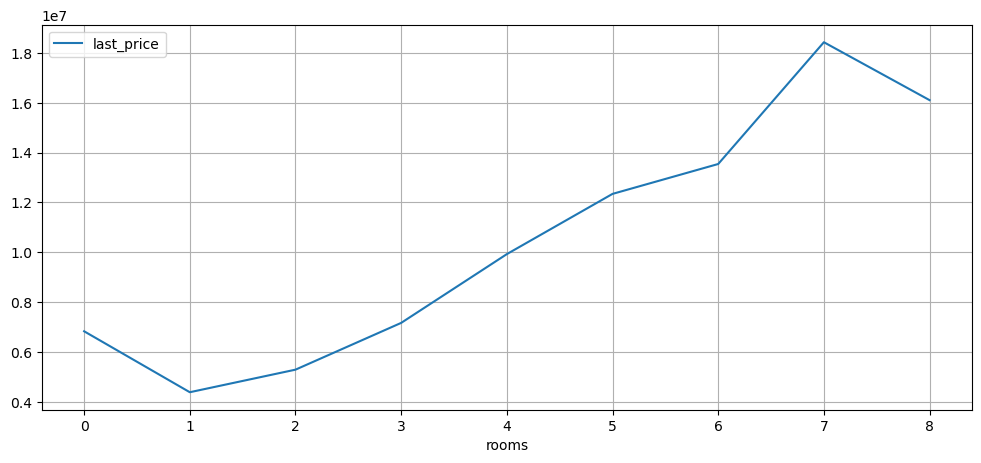

In [372]:
good_data.pivot_table(index='rooms',values='last_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusion:**
 1. The more rooms, the higher the price.
 2. After a certain size (7 rooms), the price no longer increases.

<Axes: xlabel='rooms'>

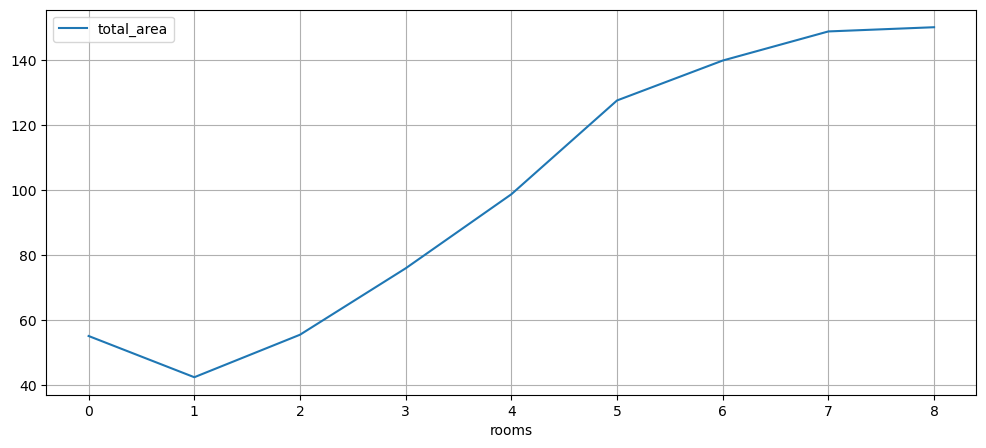

In [373]:
good_data.pivot_table(index='rooms',values='total_area',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusion::**  
1. In most listings, the number of rooms increases with the apartment's total area.

In [374]:
rooms_stat = good_data.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc=['mean','count']
)
rooms_stat.columns = ['Average price per m²','Count in group']
rooms_stat.sort_values(by='Average price per m²', ascending=False)

Average price per m²  Count in group
rooms                                      
7              1.842077e+07              13
8              1.610000e+07               1
6              1.354139e+07              41
5              1.234375e+07             220
4              9.930660e+06            1041
3              7.174985e+06            5526
0              6.838625e+06               8
2              5.300880e+06            7630
1              4.396873e+06            4093

In [375]:
#check if all open-plan apartments have 0 rooms
len(good_data.query('rooms != 0 and open_plan == True'))

7

In [376]:
len(good_data.query('open_plan == True'))

8

Most open-plan apartments have 0 rooms.
Let's look at the share of open-plan vs non-open-plan apartments (unfortunately, pie/bar chart can't be rendered here).

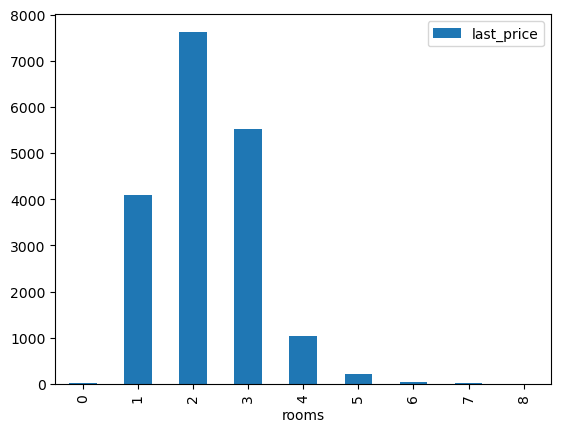

In [377]:
# reviewer code
good_data.pivot_table(index='rooms',values='last_price',aggfunc='count').plot.bar();

#### Ceiling height:

<Axes: xlabel='ceiling_height'>

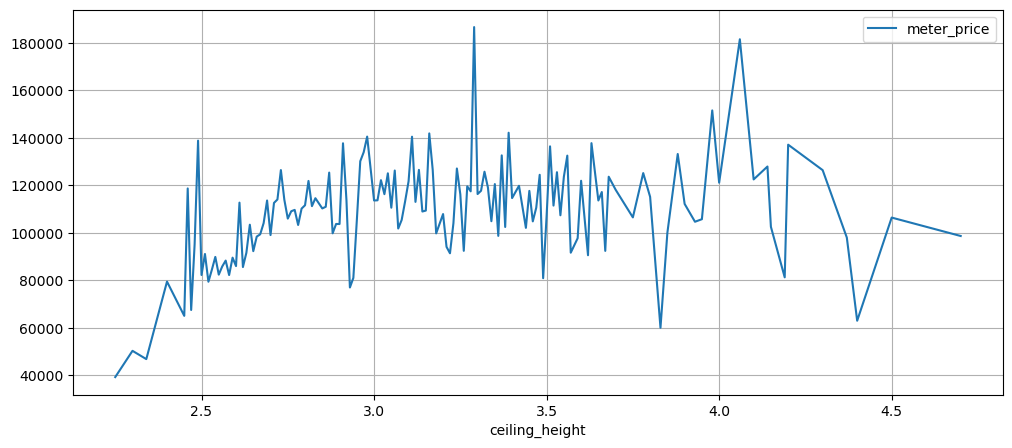

In [378]:
good_data.pivot_table(index='ceiling_height',values='meter_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusions:**  

1. With slight fluctuations, the price per m² increases as ceiling height rises from 2.5m to 3m.  
2. From 3m to 4m, there is no significant further growth.  

#### Apartment floor:

<Axes: xlabel='floor'>

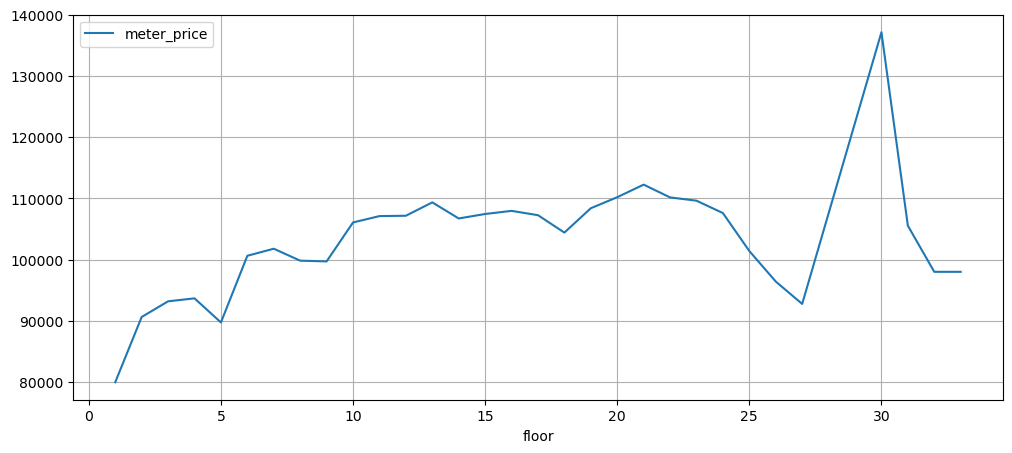

In [379]:
good_data.pivot_table(index=['floor'],values='meter_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusions:**

1. From the 1st to the 25th floor, apartment prices remain within 75 million.
2. There are price spikes for apartments around the 27th floor.
3. Overall, price per m² does not strongly depend on floor level.

<Axes: xlabel='floor'>

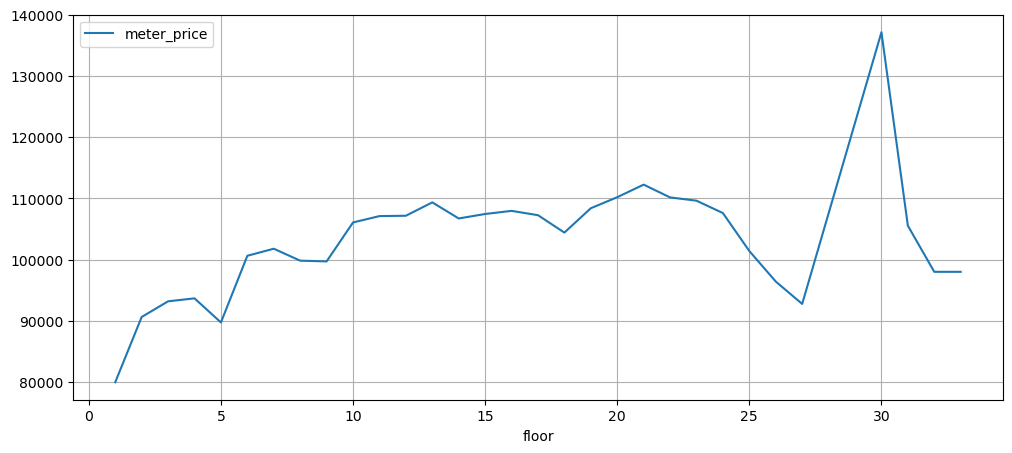

In [380]:
good_data.pivot_table(index=['floor'],values='meter_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusion:**  

1. Price per m² does not vary much by floor starting from the 6th floor.  
2. Lower floors have lower prices, possibly due to the lack of a view.  

In [381]:
floor_stat = good_data.pivot_table(
    index='floor_category',
    values='last_price',
    aggfunc=['mean','count']
)
floor_stat.columns = ['Average total price', 'Count in group']
floor_stat.sort_values(by='Average total price', ascending=False)

Average total price  Count in group
floor_category                                     
Другой                 6.270769e+06           13705
Последний этаж         5.779297e+06            2588
Первый этаж            4.873814e+06            2280

**Conclusion:**  

1. The first and top floor groups do not differ significantly, though there are more apartments on the top floor.  
2. Apartments on the top floor have a slightly higher average price.  
3. The "other floors" group is much larger, but its average price is not much different from the first and top floors.  

<Axes: xlabel='floors_total'>

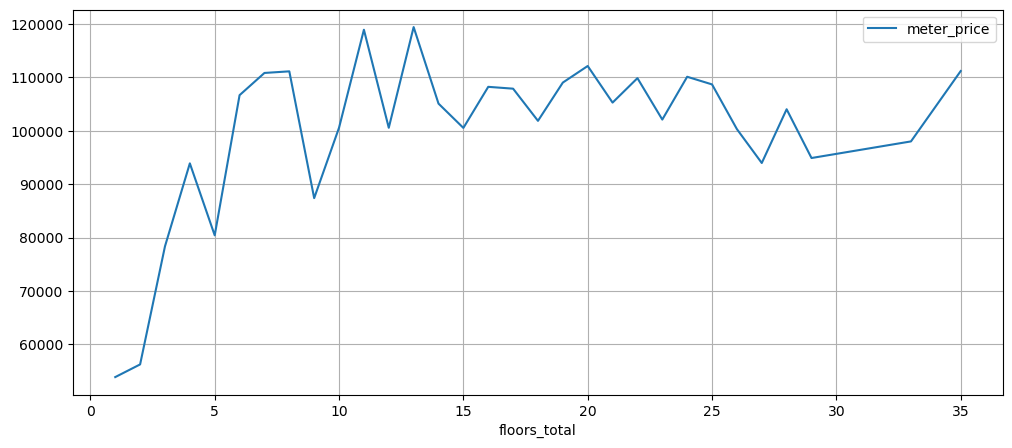

In [382]:
good_data.pivot_table(index=['floors_total'],values='meter_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusion:**  

1. Buildings with 5 floors or fewer have a lower average price per square meter than 9-story buildings.  
2. Buildings with 15–30 floors show little variation in price.  
3. Buildings with 35 floors or more have a higher average price per square meter.  
4. 8–9 story buildings have the highest average price per square meter.  

#### **Distance to city center (in meters):**

<Axes: xlabel='city_center_km'>

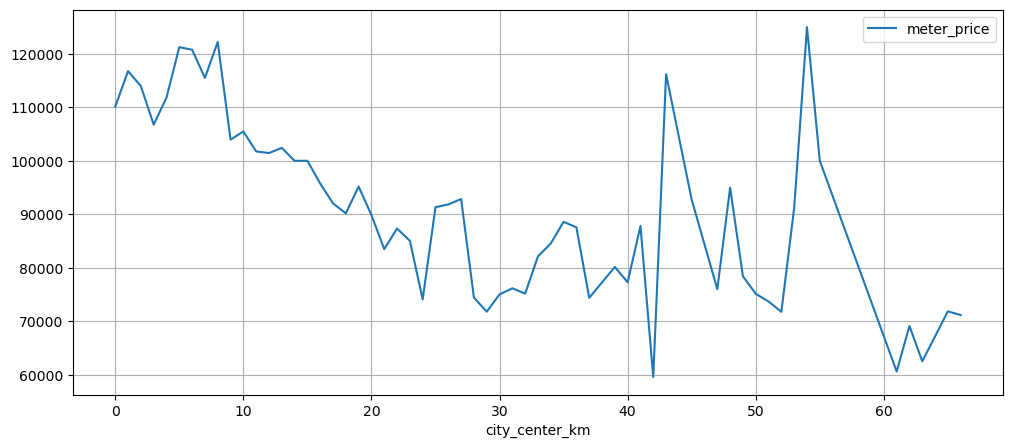

In [383]:
good_data.pivot_table(index='city_center_km',values='meter_price',aggfunc='median').plot(grid=True, figsize=(12, 5))

**Conclusions:**  

1. Despite fluctuations, there is a clear trend of decreasing price per m² with greater distance from the city center.  
2. Apartments closest to the center have the highest price per m².  

#### **Distance to nearest airport:**

<Axes: xlabel='airports_nearest'>

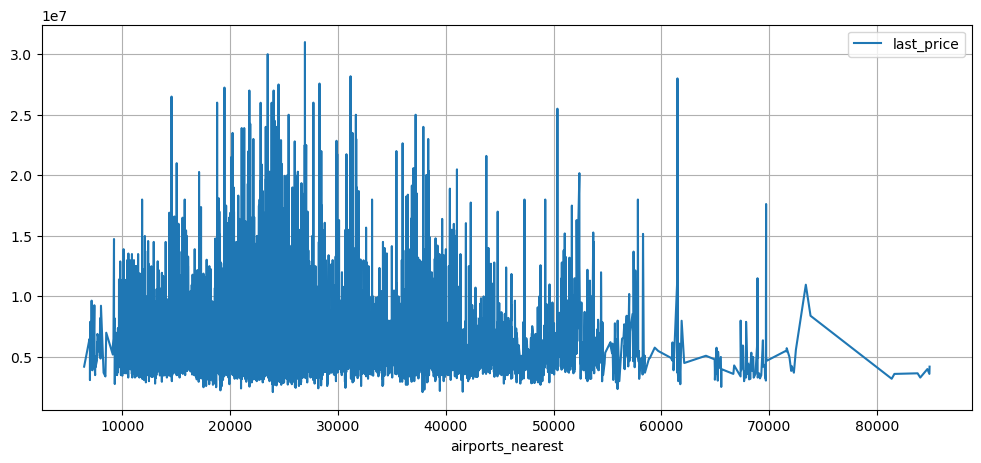

In [384]:
good_data.pivot_table(index='airports_nearest',values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5))

**Conclusion:**  
1. Proximity or distance to the airport does not significantly affect the price per square meter.  

#### **Distance to nearest park:**  

<Axes: xlabel='parks_nearest'>

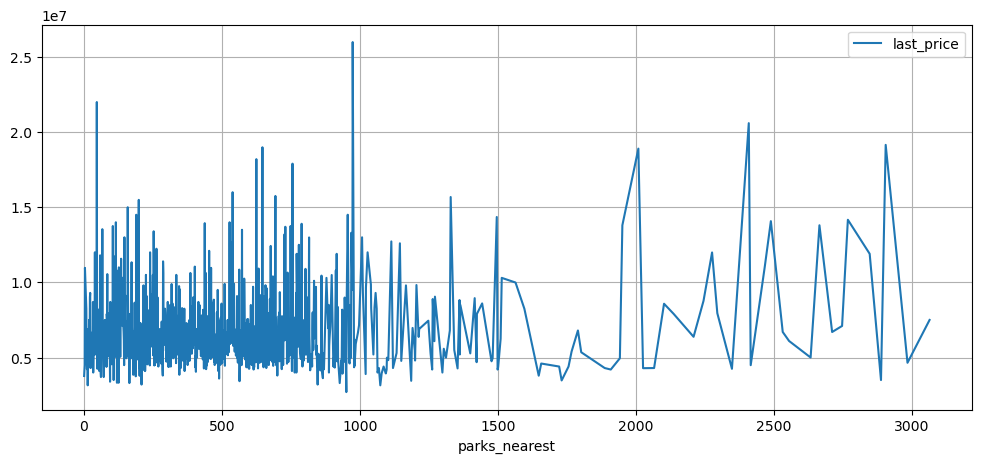

In [385]:
good_data.pivot_table(index='parks_nearest',values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5))

<Axes: xlabel='parks_around3000'>

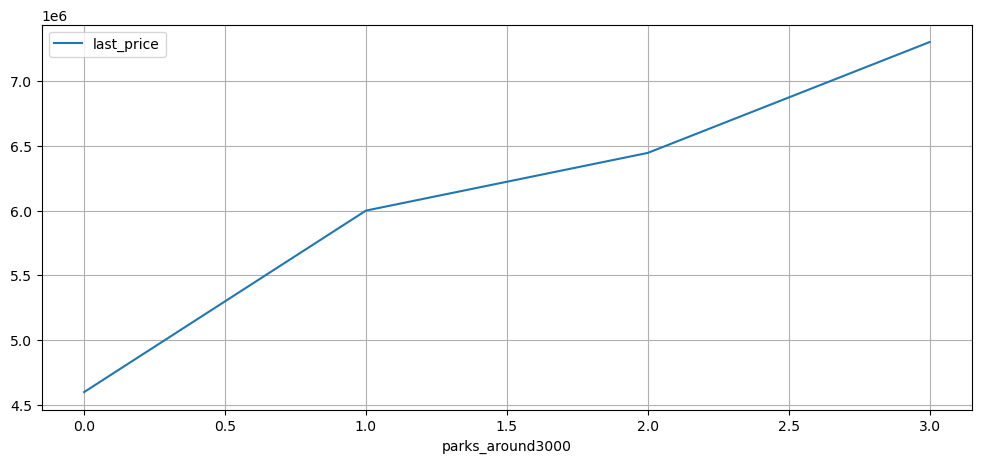

In [386]:
good_data.pivot_table(index='parks_around3000',values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5))

**Conclusion:**  
1. There is no clear dependence on the distance to parks.  
2. The presence of a park has an impact: apartments with a park within 3 km are almost 20% more expensive. 

#### **Day and month of listing publication**  

<Axes: >

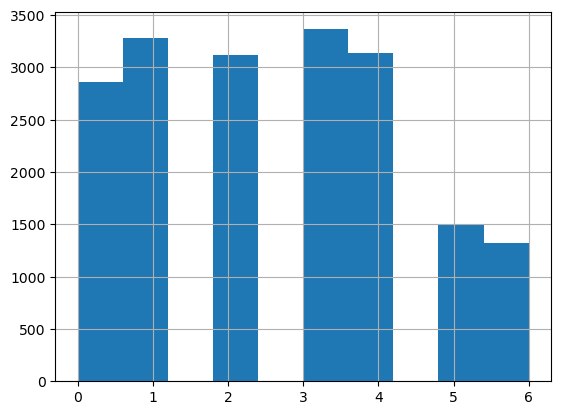

In [387]:
good_data['weekday'].hist()

<Axes: xlabel='weekday'>

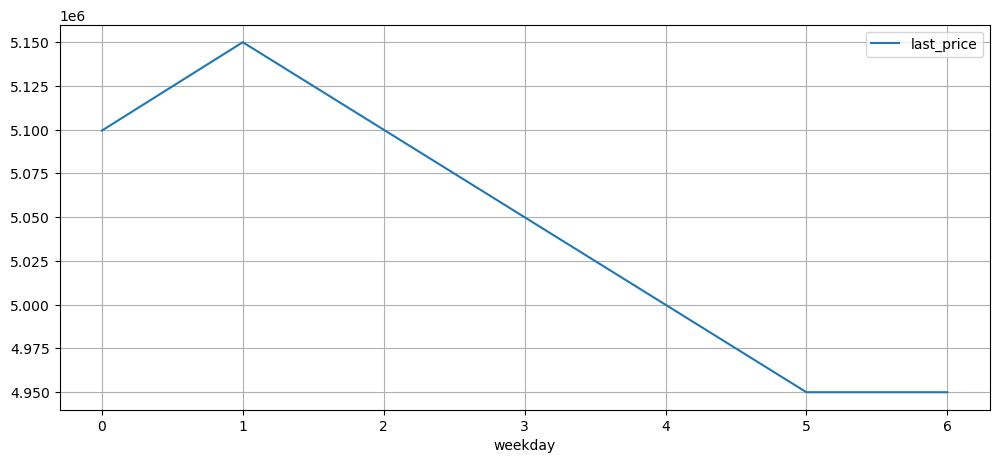

In [388]:
good_data.pivot_table(index='weekday',values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5))

<Axes: >

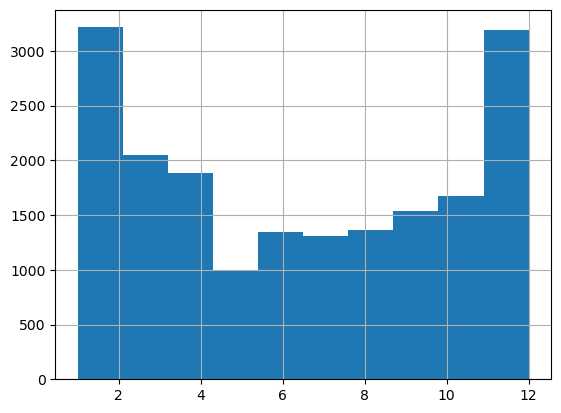

In [389]:
good_data['month'].hist()

<Axes: xlabel='month'>

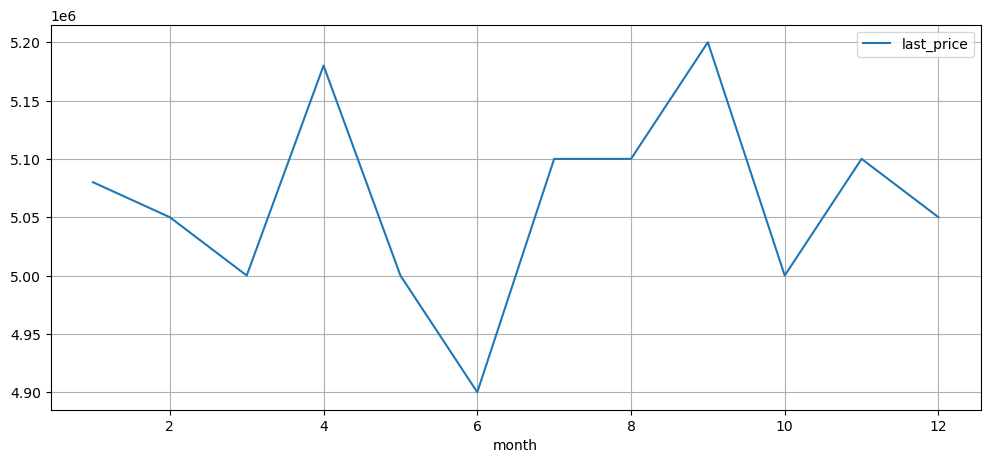

In [390]:
good_data.pivot_table(index='month',values='last_price',aggfunc='median').plot(grid=True, figsize=(12, 5))

In [391]:
weekday_stat = good_data.pivot_table(
    index='weekday',
    values='last_price',
    aggfunc=['median','count']
)
weekday_stat.columns = ['Median total price', 'Count in group']
weekday_stat.sort_values(by='Median total price', ascending=False)

Median total price  Count in group
weekday                                    
1                   5150000            3282
2                   5100000            3117
0                   5099500            2856
3                   5050000            3364
4                   5000000            3135
5                   4950000            1499
6                   4950000            1320

In [392]:
month_stat = good_data.pivot_table(
    index='month',
    values='last_price',
    aggfunc=['median','count']
)
month_stat.columns = ['Median total price', 'Count in group']
month_stat.sort_values(by='Median total price', ascending=False)

Median total price  Count in group
month                                    
9                 5200000            1534
4                 5180000            1887
7                 5100000            1312
8                 5100000            1366
11                5100000            1865
1                 5080000            1154
2                 5050000            2062
12                5050000            1327
3                 5000000            2050
5                 5000000             991
10                5000000            1676
6                 4900000            1349

**Conclusion:**  

1. Listings published in summer sold on average 5% cheaper.  
2. Listings published in September were on average 12% more expensive than those published in June.  
3. Listings published at the end of the week were 4% cheaper.  
4. Listings published mid-week were priced 1% higher than those on other days.  
5. Sellers post listings least often on Saturdays and most often on Thursdays.  
6. Sellers post listings least often in summer and most often in winter.  

#### **Which factors most affect the total (final) cost of the property?**

At the beginning of this section, we identified which factors influence apartment prices the most.  
Now let’s look at the scatter matrix:  

array([[<Axes: xlabel='last_price', ylabel='last_price'>,
        <Axes: xlabel='meter_price', ylabel='last_price'>,
        <Axes: xlabel='total_area', ylabel='last_price'>,
        <Axes: xlabel='living_area', ylabel='last_price'>,
        <Axes: xlabel='kitchen_area', ylabel='last_price'>],
       [<Axes: xlabel='last_price', ylabel='meter_price'>,
        <Axes: xlabel='meter_price', ylabel='meter_price'>,
        <Axes: xlabel='total_area', ylabel='meter_price'>,
        <Axes: xlabel='living_area', ylabel='meter_price'>,
        <Axes: xlabel='kitchen_area', ylabel='meter_price'>],
       [<Axes: xlabel='last_price', ylabel='total_area'>,
        <Axes: xlabel='meter_price', ylabel='total_area'>,
        <Axes: xlabel='total_area', ylabel='total_area'>,
        <Axes: xlabel='living_area', ylabel='total_area'>,
        <Axes: xlabel='kitchen_area', ylabel='total_area'>],
       [<Axes: xlabel='last_price', ylabel='living_area'>,
        <Axes: xlabel='meter_price', ylabel='living

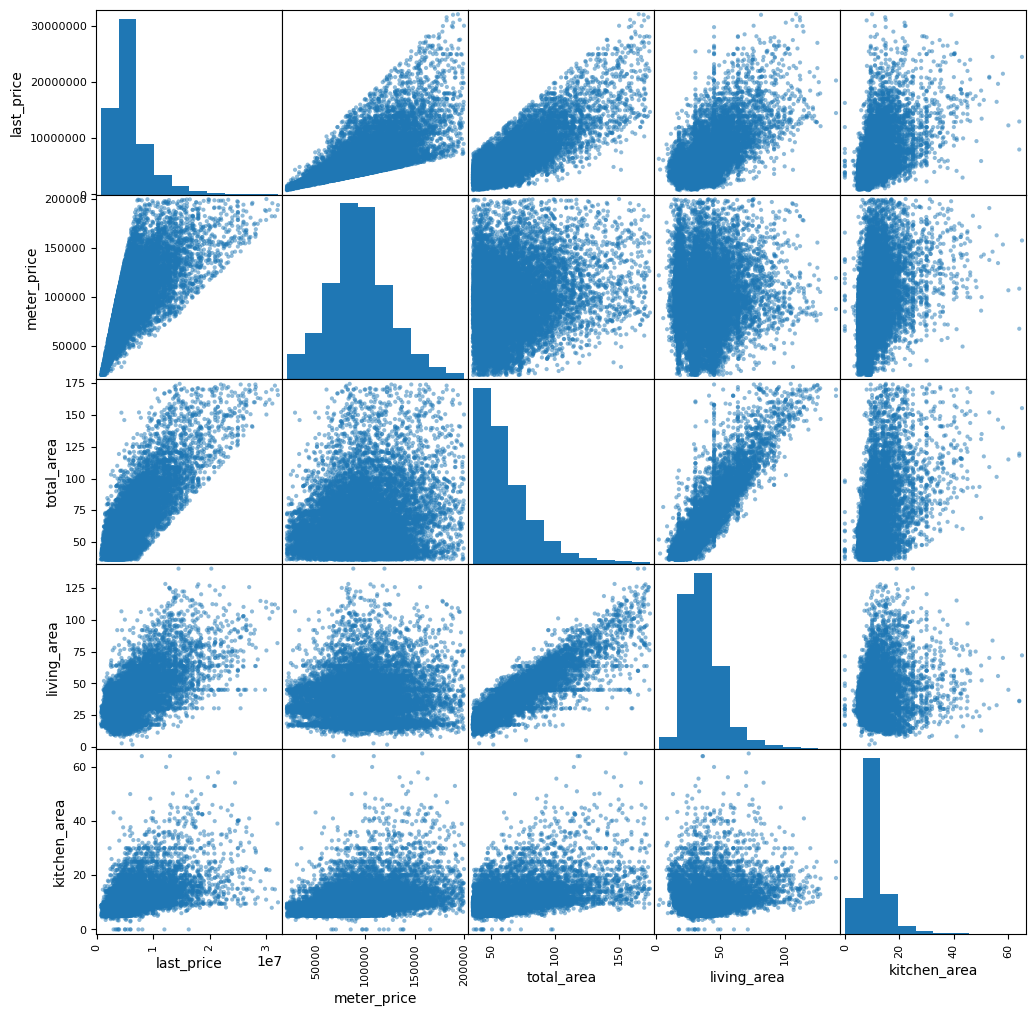

In [393]:
data_for_matrix = good_data.loc[:, ['last_price', 'meter_price','total_area','living_area','kitchen_area']]
pd.plotting.scatter_matrix(data_for_matrix, figsize=(12, 12)) 

**Conclusion:**  

1. Price growth is directly proportional to price per square meter up to 10 million per property; beyond that, the relationship weakens.  
2. Properties up to 25 million show a dependence on total area (the larger the area, the higher the price), while more expensive properties depend less on it.  
3. A similar relationship is seen with living area: properties up to 15 million are more dependent on living area size.  
4. There is no direct relationship between price and kitchen area, but most apartments with a kitchen area up to 25 m² cost up to 20 million.  

#### **How quickly apartments were sold**

count    16005.000000
mean       184.818182
std        221.633234
min          1.000000
25%         45.000000
50%         99.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64


<Axes: >

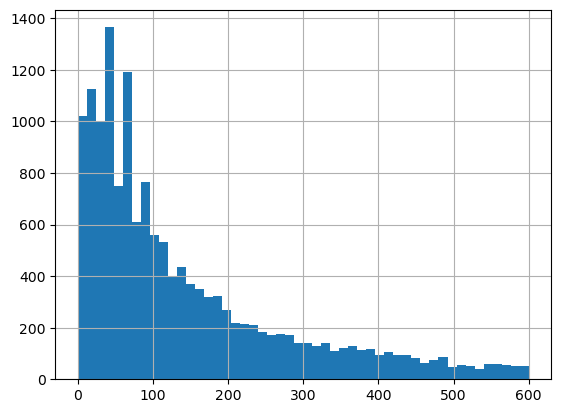

In [394]:
print(good_data['days_exposition'].describe())
good_data['days_exposition'].hist(bins=50,range=(0,600))

**Conclusion:**  

1. The distribution of the number of days a listing stays on the site is normal.  
2. Most often, listings are removed after 3 months.  
3. Listings rarely stay up for more than 600 days.  
4. An abnormally long listing period is more than 1.5 years.  
5. Between 0 and 100 days, there are many peaks worth reviewing.  

<Axes: >

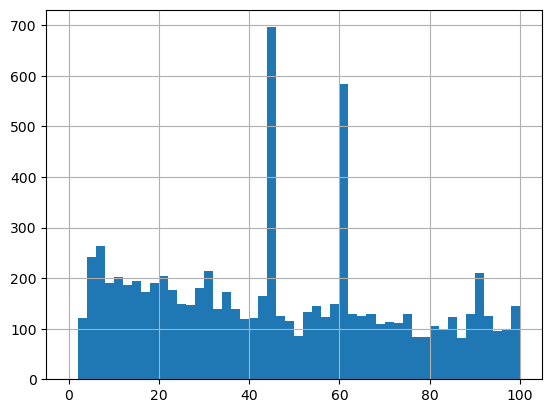

In [395]:
good_data['days_exposition'].hist(bins=50,range=(0,100))

**Conclusion:**  

1. There is a noticeable peak around 45 days and another around 60 days.  
   This can be explained by the listing durations on the site:  
   - up to 4.5 million — 45 days,  
   - from 4.5 to 10 million — 60 days.  

Since we identified abnormally long apartment sales, we will remove such listings.  

In [396]:
good_data_exp = good_data.query('21 < days_exposition < 400')

<Axes: >

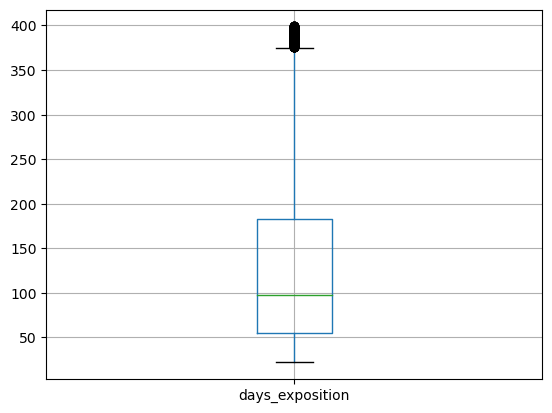

In [397]:
good_data_exp.boxplot('days_exposition')

Let’s review fast sales. We will define a fast sale as a deal closed within 3 weeks after publication.  

In [398]:
len(good_data.query('days_exposition < 21'))

1878

In [399]:
good_data.query('days_exposition < 21').sort_values(by='days_exposition').head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
1632             19     4000000        49.9           2019-05-01      2   
16053             4     4070000        45.1           2019-04-30      2   
13061            20     6100000        51.4           2019-04-29      2   
16686            20     8500000        74.8           2017-12-08      2   
10212            14     4850000        47.5           2017-09-26      2   
14359            12     4200000        39.0           2017-11-04      1   
10426            16     4600000        50.8           2018-02-28      2   
10451             8     5650000        62.0           2018-09-28      3   
21799             7     5300000        56.5           2018-04-06      2   
19049            19    10500000        77.4           2017-05-22      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1632             2.50           9.0         25.0      1          NaN   False   
16053            2.65           5.0         22.7      3          NaN   False   
13061            3.00           5.0         31.7      4          NaN   False   
16686            2.80          25.0         27.0     12          NaN   False   
10212            2.65           9.0         26.7      7          NaN   False   
14359            2.65          24.0         19.2      4          NaN   False   
10426            2.65          16.0         31.7     10          NaN   False   
10451            2.57           9.0         39.5      8          NaN   False   
21799            2.70          12.0         33.4     12        False   False   
19049            2.65          25.0         46.1      9        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1632       False          10.0        0  санкт-петербург           13567.0   
16053      False           6.6        0  санкт-петербург           40859.0   
13061      False           6.9        1  санкт-петербург           10776.0   
16686      False          14.0        2  санкт-петербург           40660.0   
10212      False           6.2        0  санкт-петербург           45396.0   
14359      False           9.0        0  санкт-петербург           32837.0   
10426      False           7.0        1  санкт-петербург           16403.0   
10451      False           9.4        0  санкт-петербург           23916.0   
21799      False          10.5        1  санкт-петербург           50463.0   
19049      False          13.7        2  санкт-петербург           36827.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1632               14384.0                 1           20.0                 1   
16053              11668.0                 2          485.0                 0   
13061               9389.0                 0            NaN                 0   
16686              12363.0                 2          422.0                 0   
10212              18968.0                 0            NaN                 0   
14359              13936.0                 0            NaN                 0   
10426              11646.0                 0            NaN                 1   
10451              11486.0                 1          631.0                 0   
21799              15791.0                 0            NaN                 0   
19049              12348.0                 1          485.0                 1   

       ponds_nearest  days_exposition  meter_price  weekday  month  year  \
1632           681.0              1.0        80160        2      5  2019   
16053            NaN              2.0        90244        1      4  2019   
13061            NaN              2.0       118677        0      4  2019   
16686            NaN              3.0       113636        4     12  2017   
10212            NaN              3.0       102105        1      9  2017   
14359            NaN              3.0       107692        5     11  2017   
10426         121

There are not many such cases, but they should not be removed — a listing can “stay up” for any length of time, and this is not a strong anomaly.  

We can instead look at a plot of listing duration versus price per square meter, keeping only listings with a “normal duration.”  

<Axes: xlabel='days_exposition'>

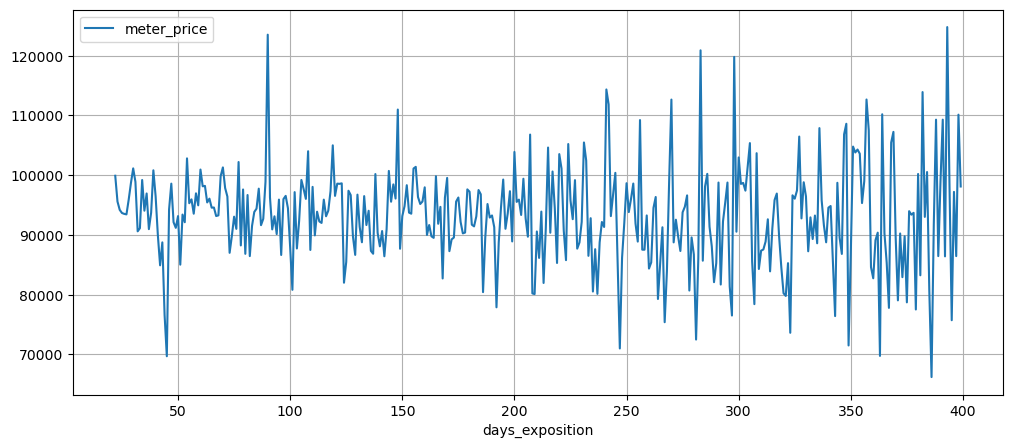

In [400]:
(good_data_exp
    .pivot_table(index='days_exposition',values='meter_price',aggfunc='mean')
     .plot(grid=True, figsize=(12, 5))
)

**Conclusion:**  

1. Listings that were sold the fastest had less variance in price per square meter.  

Now let’s see how the listing duration depended on the year the listing was published:  

<Axes: xlabel='year'>

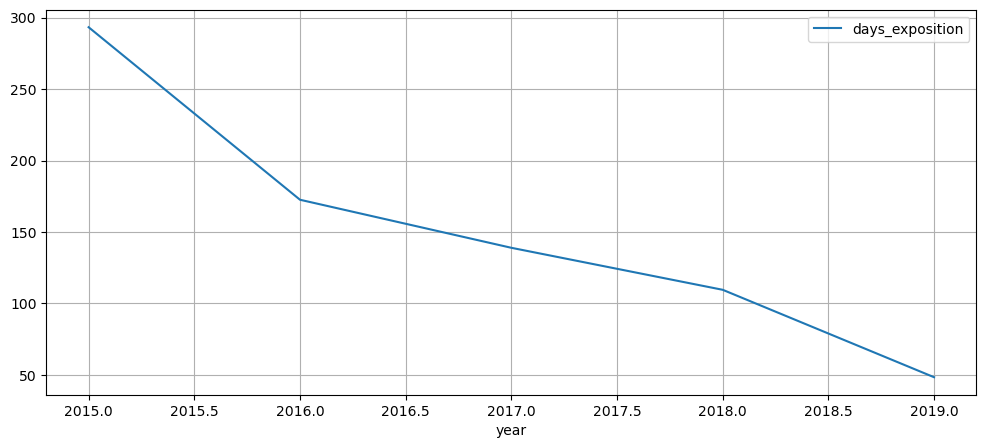

In [401]:
(good_data_exp
    .pivot_table(index='year',values='days_exposition',aggfunc='mean')
     .plot(grid=True, figsize=(12, 5))
)

**Conclusion:**  

1. Listings published in 2015 stayed on the site the longest, while those from 2019 and 2014 stayed the shortest.  
2. There is a clear trend toward faster sales starting from 2016.  

Let’s see how the listing duration depended on the number of attached photos (considering only completed listings).  

Recalling the distribution of `total_images`, the tail after 20 photos can be ignored, since such listings are very few.  

<Axes: xlabel='total_images'>

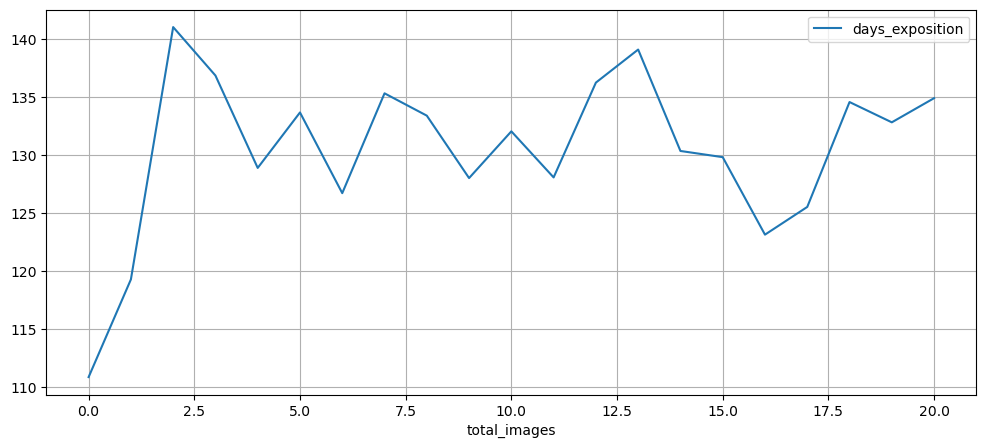

In [402]:
(good_data_exp
 .query('days_exposition != 0 and total_images <= 20')
 .pivot_table(index='total_images',values='days_exposition')
 .plot(grid=True, figsize=(12, 5))
)

**Conclusion:**  

1. On average, listings without photos were removed the fastest, but this may be due to them being deleted and reposted, or because they were drafts.  
2. From 2 to 5 photos, there is a slight decrease in the average listing duration.  
3. Overall, there is no strong relationship between the number of photos and the listing duration.  

#### **Average price in localities**

The average price per square meter in the 10 localities with the highest number of listings.  

In [403]:
head_local = good_data['locality_name'].value_counts().head(10)
head_local

санкт-петербург      12620
посёлок шушары         360
всеволожск             336
посёлок мурино         314
пушкин                 299
посёлок парголово      272
колпино                266
гатчина                247
деревня кудрово        188
выборг                 183
Name: locality_name, dtype: int64

In [404]:
(good_data
.query('locality_name in @head_local.index')
.pivot_table(index='locality_name',values='meter_price',aggfunc='mean')
.sort_values(by='meter_price',ascending=False)
)

meter_price
locality_name                   
санкт-петербург    107578.376307
пушкин             102175.889632
деревня кудрово     89533.542553
посёлок парголово   88873.779412
посёлок мурино      80685.019108
посёлок шушары      75914.544444
колпино             72392.375940
гатчина             68517.291498
всеволожск          66762.083333
выборг              57343.218579

**Conclusion:**  

1. The highest price per square meter is in Saint Petersburg.  
2. The lowest price per square meter is in Vyborg.  

#### **How property value depends on distance from the city center**

Average price per kilometer in Saint Petersburg.  

In [405]:
data_spb = good_data.query('locality_name == "санкт-петербург"')

spb_mean = data_spb.pivot_table(index='locality_name',values=['last_price','city_center_km'],aggfunc='mean').astype('int')

(spb_mean['last_price']/spb_mean['city_center_km'])


locality_name
санкт-петербург    640733.636364
dtype: float64

How property value depends on distance from the city center.  

<Axes: xlabel='city_center_km'>

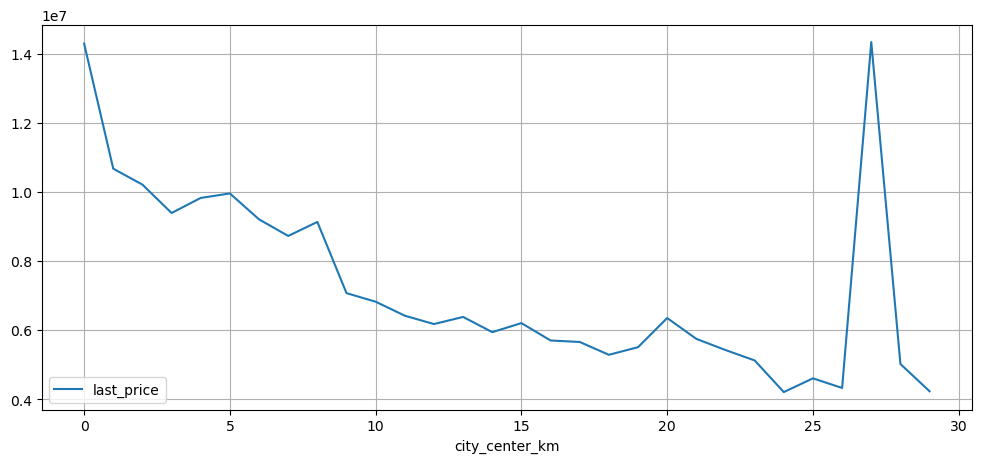

In [406]:
data_spb.pivot_table(index='city_center_km',values='last_price',aggfunc='mean').plot(grid=True, figsize=(12, 5))

**Conclusion:**  

1. There is a clear decrease in property price as the distance from the city center increases.  
2. There is a spike on the graph, likely indicating a prestigious area 27 km from the center where apartments are more expensive.  

### General conclusion

1. Most apartments sold in Saint Petersburg and the Leningrad region fall within 30–60 m² of total area.  
2. Most apartments are priced between 75,000–125,000 RUB per square meter.  
3. There is no direct correlation between living area/kitchen area and price per m².  
4. There is a clear tendency for prices to increase with larger total area.  
5. Apartments with more rooms are more expensive (number of rooms correlates with total area).  
6. Apartments with ceilings around 3 m have a higher price per m² than those with lower ceilings.  
7. Price per m² does not strongly depend on floor level.  
8. 8–9 story buildings have the highest average price per m².  
9. Apartments closest to the city center have the highest price per m².  
10. The presence of a park affects price: apartments within 3 km of a park are almost 20% more expensive.  
11. Sellers post listings least often on Saturdays and most often on Thursdays.  
12. Sellers post listings least often in summer and most often in winter.  
13. The highest price per square meter is in Saint Petersburg.  
14. The lowest price per square meter is in Vyborg.  